<font size="10" color="black">Introdução à Probabilidade e Estatística</font>

Eduardo Chaves Ferreira

## O que será tratado no curso

Conceito de incerteza

Diferença entre análise estatística e análise probabilística

Diferença entre probabilidade/estatística e aprendizado de máquina

Introdução à probabilidade

Distribuições de probabilidade

Conceitos de estatística

Estatística Descritiva - Conceitos básicos 

Inferência Estatística

Teorema do limite central

Grau de certeza e intervalo de confiânça

Outliers



## O que não será tratado no curso

Matemática pura

Demonstrações

Conceitos aprofundados de probabilidade e estatística

## Onde estamos no processo de mineração de dados?

[--Extração e limpeza--]

           [--Estatística--]
           
                   [--Regras determinísticas--]
                   
                              [--Mineração de dados--]

## Importação de bibliotecas usadas nos exemplos

In [1]:
'''
As bibliotecas usadas são:
random
statistic
numpy.random
scipy.stats
pandas
matplotlib
statsmodels
pandas-profiling
'''

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat

import os

path = os.environ['PATH']

if path.startswith('C'):
    IN_KAGGLE = False
else:
    IN_KAGGLE = True

## Mantendo a reprodutibilidade dos resultados

Antes da geração de números aleatórios é importante inicializar o gerador de números para que os resultados sejam os mesmos

In [2]:
# Para uso com funções da biblioteca standard (ex random.randint)
random.seed(1)
# Para uso com funções da biblioteca numpy (ex np.random.randint)
np.random.seed(1)

# Quando for passada como parâmetro a seed
random_state = 1

## Funções gerais usadas nos exemplos

In [3]:
# Permutação: possibilidades de colocação de n objetos em n posições = n!
def permutacao (n):
    return math.factorial(n)

# Arranjo: p objetos em n posições, ordem importa = n!/(n-p)!
def arranjo (n,p):
    return math.factorial(n)/math.factorial(n-p)

# Combinação: p objetos em n posições, ordem não importa = n!/(n-p)!p!
def combinacao (n,p):
    return math.factorial(n)/(math.factorial(n-p)*math.factorial(p))

# Variações possíveis havendo n slots e p possibilidades para cada um
def possibilidades(n,p):
    return p**n

<font size="6" color="red">Conceito de Incerteza</font>

Há processos que são descritos de forma precisa, por equações analíticas.

Exemplo: aceleração de um corpo submetido a uma força
a = F/m

Conseguimeos determinar precisamente a aceleração do corpo de acordo com F e m

Neste caso não há necessidade de utilizar probabilidade ou estatística

Vamos ao exemplo:

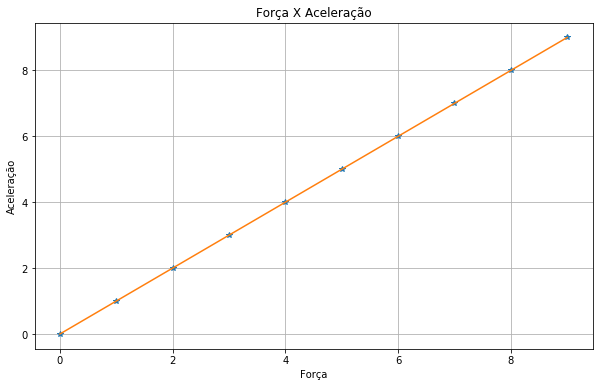

In [4]:
# Para qualquer valor de F podemos determinar precisamente qual será a aceleração do corpo

m = 1
F = np.arange(0.0,10.0,1)
a = F/m

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(F,a,'*')
plt.plot(F,a)

plt.xlabel('Força')
plt.ylabel('Aceleração')
plt.title('Força X Aceleração')
plt.grid(True)

plt.show()

Há processos cujo resultado não é determinístico, ou seja, seu resultado pode variar entre execuções.

Tais processos são chamados <b>estocásticos</b>.

Um exemplo é o lançamento de uma moeda.

Neste caso podemos usar probabilidade/estatística para quantificar a incerteza do resultado.

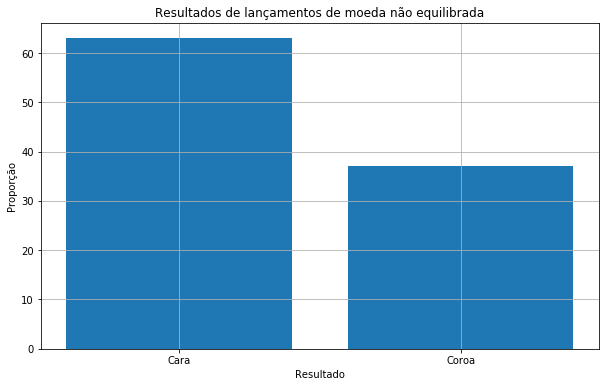

In [5]:
# No lançamento da moeda não podemos prever qualquer resultado específico, 
# mas podemos determinar a probabilidade de cada resultado

# Inicialização de variáveis
escolhas = ['Cara','Coroa']
lancamentos = 100
# Executa 100 lançamentos da moeda com probabilidade 6/10 de Cara e 4/10 de Coroa
resultados = random.choices(population=escolhas, weights=[6/10,4/10], k=lancamentos)

fig, ax = plt.subplots(figsize=(10,6))
ind = range(1,len(escolhas)+1)
# Calcula o percentual de Caras e Coroas
proporcoes = [resultados.count('Cara')/lancamentos*100,resultados.count('Coroa')/lancamentos*100]
plt.bar(ind,proporcoes,align='center')
ax.set_xticks(ind)
ax.set_xticklabels(escolhas)


plt.xlabel('Resultado')
plt.ylabel('Proporção')
plt.title('Resultados de lançamentos de moeda não equilibrada')
plt.grid(True)
plt.show()

Neste exemplo não podemos garantir o resultado de nenhum lançamento específico, podemos, porém, verificar que temos aproximadamente 0,6 de probabilidade de cara e 0,4 de coroa. 

Embora haja incerteza, conseguimos quantificá-la de alguma forma.

Note que as proporções encontradas não são exatamente 60% e 40%. Isso porque, apesar de estabelecermos probabilidades para cara e coroa de 0,4 e 0,6, não há certeza em relação a cada lançamento. É isso, justamente, que caracteriza um processo estocástico e o diferencia de um processo determinístico.



<font size="6" color="red">Quando usar probabilidade/estatística?</font>

Se você tem um processo determinístico com regras **conhecidas**, não usará.

Se você tem um processo determinístico cujas regras não conhece, pode usar estatística descritiva para conhecer melhor o processo e depreender suas regras.

Pode ser também que o processo seja determinístico, mas a obtenção das regras seja tão complexa que seja preferível tratá-lo como um processo estocástico.

Se você tem um processo estocástico (aleatório), com certeza usará.


<font size="6" color="red">Diferença entre análise estatística (descritiva e inferência) e análise probabilística</font>

Há processos estocásticos sobre os quais conhecemos as <b>probabilidades básicas</b>. 

Como exemplo temos o lançamento de uma moeda, que, caso seja equilibrada, tem probabilidade de 0,5 para Cara e Coroa.

Neste caso, usando as probabilidades básicas, podemos inferir o comportamento de eventos complexos. Por exemplo, a probabilidade de obtermos m caras em n lançamentos.

Nessas condições, utilizamos ferramentas de <font color="red">análise probabilística</font>.

Há situações em que temos apenas dados gerados pelo processo estocástico (toda a população ou somente uma amostra), sem conhecer as probabilidades básicas que conduzem o processo. Por exemplo, temos o resultado de pesquisas eleitorais com pequenas parcelas da população. 

Nesta situação, usamos <font color="red">análise estatística</font> para analisar os dados (estatística descritiva) e inferir as características do processo (inferência estatística).



<font size="6" color="red">Diferença entre estatística e probabidade na prática</font>

Probabilidade trata do mundo "teórico", quando as probabilidades básicas são bem definidas e seguidas pelos processos, ou seja, quase nunca ocorre no mundo real.

Estatística trata do mundo "real", como as coisas acontecem de verdade. Os eventos são afetados por muitas variáveis, dificilmente seguem regras probabilísticas precisas, ou melhor, seguem regras muito complexas, de difícil determinação.

Probabilidade traz muitos conceitos que fundamentam a análise estatística, principalmente a inferência estatística.


<font size="6" color="red">Diferença entre probabilidade/estatística e aprendizado de máquina</font>


Como será apresentado, a estatística descritiva, juntamente com a visualização de dados, permite descobrir informações relevantes sobre cada variável analisada, bem como relações entre elas.

Entretanto, quando a quantidade de variáveis em análise é grande e/ou seu relacionamento complexo, normalmente não linear, não conseguimos inferir corretamente as relações existentes, seja por limitação de nossa capacidade de avaliação, seja pela limitação dos métodos estatísticos.

Nesse momento são usadas técnicas de <font color="red">aprendizado de máquina</font> para tentar descobrir as relações complexas presentes nos dados.

Ambas as técnicas (estatística e aprendizado de máquina) atuam sobre dados, buscando extrair informações. 

A principal diferença é até onde vai nossa capacidade de interpretação e a partir de onde delegamos a interpretação para a máquina.

Técnicas estatísticas têm a vantagem de apresentar resultados com margem de erro e nível de confiânça. Aprendizado de máquina tem a vantagem de conseguir tratar relacionamentos complexos.


In [6]:
# exemplo: 3 variáveis de entrada com relacionamento não linear entre elas

# Cria três variáveis com valores aleatórios uniformemente distribuídos no intervalo [0,0 1,0)
x = np.random.random_sample(size=1000)
y = np.random.random_sample(size=1000)
z = np.random.random_sample(size=1000)

# Cria uma variável formada pela combinação não linear das três anteriores
w = x**2-y**2+z**3
# Escalona w para que fique no intervalo [-1 1]
w = w/np.max(np.abs(w))




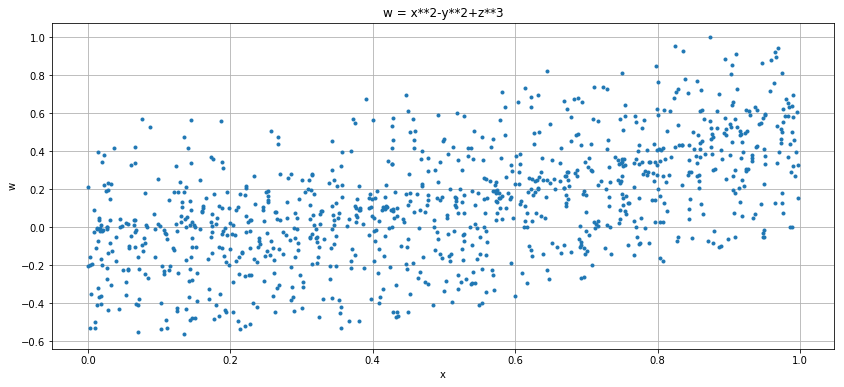

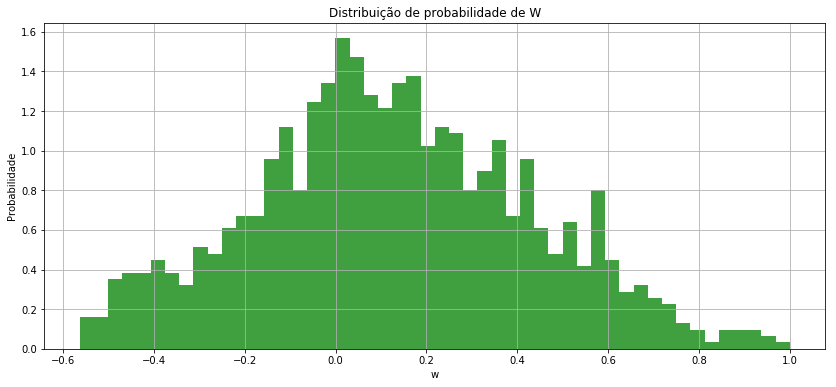

Matriz de correlações entre as variáveis
[[ 1.          0.02932132  0.03484398  0.55758206]
 [ 0.02932132  1.          0.00125717 -0.57748303]
 [ 0.03484398  0.00125717  1.          0.51917798]
 [ 0.55758206 -0.57748303  0.51917798  1.        ]]

Análise estatística/probabilística
Média de w 0.12551779649402783, desvio padrão de w 0.3048693212997144


In [7]:
plt.subplots(figsize=(14,6))
plt.plot(x,w,'.')
plt.xlabel('x')
plt.ylabel('w')
plt.title('w = x**2-y**2+z**3')
plt.grid(True)
plt.show()

plt.subplots(figsize=(14,6))
plt.xlabel('w')
plt.ylabel('Probabilidade')
plt.title('Distribuição de probabilidade de W')
plt.grid(True)
n, bins, patches = plt.hist(w, density=True, facecolor='g', alpha=0.75, bins=50)
plt.show()


print('Matriz de correlações entre as variáveis')
print(np.corrcoef([x,y,z,w]))

print("\nAnálise estatística/probabilística")
print("Média de w {}, desvio padrão de w {}".format(np.mean(w),np.std(w)))

A análise do gráfico não permite visualizar o relacionamento entre as variáveis (no caso w e x).

A matriz de correlação sugere a existência de dependência entre as variáveis de entrada (x,y,z) e saída (w).

Porém, a definição correta das relações é de difícil concepção sem uso de machine learning.

Usando somente probabilidade, podemos caracterizar a distribuição de probabilidade dos valores de w como uma normal de média 0,1 e desvio padrão de 0,3

In [8]:
from sklearn.neural_network import MLPRegressor

# Cria uma matriz de 3 colunas com as variáveis de entrada x, y e z
x_ = np.concatenate((np.reshape(x,(-1,1)),np.reshape(y,(-1,1)),np.reshape(z,(-1,1))), axis=1)
# Cria uma matriz de 1 coluna com a variável w
y_ = np.reshape(w,(-1,1))

# Treina o modelo com 900 valores e testa com 100 valores
x_train = x_[0:900,:]
y_train = y_[0:900,:]
x_test = x_[900:1000,:]
y_test = y_[900:1000,:]

estimator = MLPRegressor(
                              learning_rate = 'adaptive',
                              random_state = random_state,
                              verbose=True,
                                max_iter = 200,
                            hidden_layer_sizes = [100,50,40,30,20,10],   
                    solver = 'adam',
                    alpha = 0.0001,
                    activation = 'relu'
                            )

estimator.fit(x_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.21611803
Iteration 2, loss = 0.14341755
Iteration 3, loss = 0.07880311
Iteration 4, loss = 0.05141057
Iteration 5, loss = 0.04234660
Iteration 6, loss = 0.04189155
Iteration 7, loss = 0.04043295
Iteration 8, loss = 0.03732199
Iteration 9, loss = 0.03471398
Iteration 10, loss = 0.03062305
Iteration 11, loss = 0.02534543
Iteration 12, loss = 0.02020653
Iteration 13, loss = 0.01463046
Iteration 14, loss = 0.00998143
Iteration 15, loss = 0.00617049
Iteration 16, loss = 0.00430696
Iteration 17, loss = 0.00391939
Iteration 18, loss = 0.00359557
Iteration 19, loss = 0.00311852
Iteration 20, loss = 0.00292337
Iteration 21, loss = 0.00273288
Iteration 22, loss = 0.00249424
Iteration 23, loss = 0.00225814
Iteration 24, loss = 0.00215209
Iteration 25, loss = 0.00193770
Iteration 26, loss = 0.00180454
Iteration 27, loss = 0.00165533
Iteration 28, loss = 0.00152929
Iteration 29, loss = 0.00143868
Iteration 30, loss = 0.00132597
Iteration 31, loss = 0.00120812
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[100, 50, 40, 30, 20, 10],
             learning_rate='adaptive', learning_rate_init=0.001, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

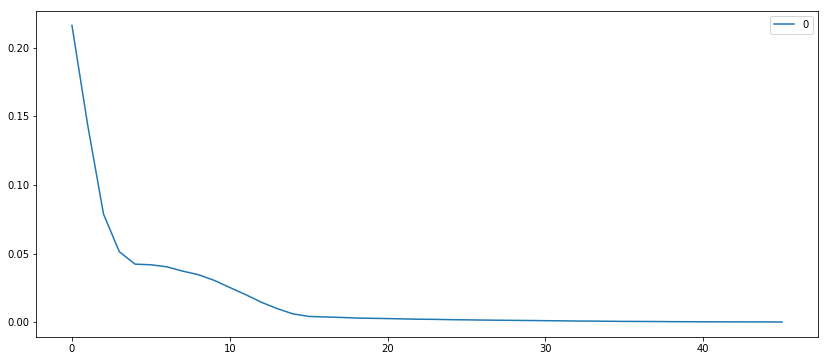

In [9]:
pd.DataFrame(estimator.loss_curve_).plot(figsize=(14,6))

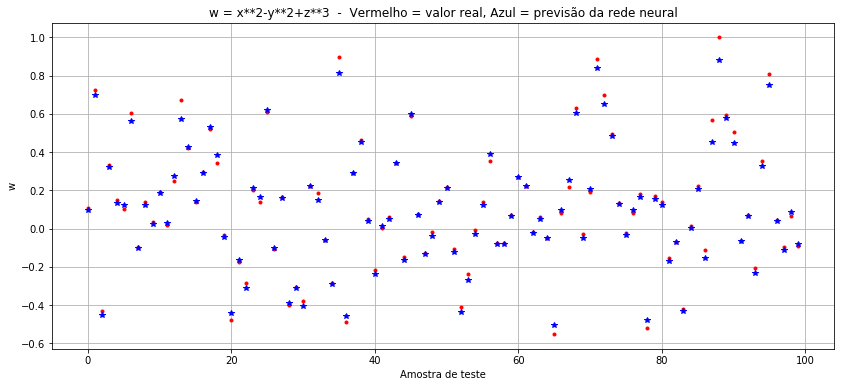

In [10]:
# Testa o modelo com os 100 exemplos reservados para teste (não usados no treinamento), 
# de forma a verificar a capacidade de generalização

plt.subplots(figsize=(14,6))
plt.plot(y_test,'r.')
plt.plot(estimator.predict(x_test),'b*')
plt.xlabel('Amostra de teste')
plt.ylabel('w')
plt.title('w = x**2-y**2+z**3  -  Vermelho = valor real, Azul = previsão da rede neural')
plt.grid(True)
plt.show()

A rede neural conseguiu capturar corretamente o relacionamento não linear entre as variáveis.


<font size="6" color="red">Introdução à probabilidade</font>



Teoria matemática para cálculo de probabilidade de eventos complexos considerando as probabilidades de eventos simples que formam o evento complexo.

Por exemplo, o lançamento de uma moeda é um evento simples, com probabilidades conhecidas. O número de caras obtidas em n  lançamentos da mesma moeda é um evento complexo, cujas probabilidades podem ser deduzidas levando-se em conta as probabilidades dos eventos simples. 

## Probabilidade - Contagem

O cálculo das probabilidades de eventos complexos pode ser feito de maneira analítica em sua forma mais simples: contagem.

No exemplo do lançamento de moedas, a probabilidade de obtermos 15 caras em 30 lançamentos pode ser calculada dividindo o número de eventos favoráveis pelo total de eventos possíveis. Para isso calculamos de quantas maneiras podemos obter 15 caras em 30 lançamentos, dividindo pelo número total de eventos possíveis em 30 lançamentos:


In [11]:
# Cálculo analítico baseado em contagem 
# Númerador = número possível de 15 caras em 30 lançamentos, denominador = total de resultados possíveis em 30 lançamentos da moeda
combinacao(30,15)/possibilidades(30,2)

0.14446444809436798

## Probabilidade - Solução analítica - Probabilidades simples

O cálculo das probabilidades de eventos complexos pode ser feito de maneira analítica, considerando as probabilidades simples.

No exemplo do lançamento de moedas, a probabilidade de obtermos m caras em n lançamentos (considerando uma moeda honesta) é dada por:

P(n,m) = Combinação(n,m) x 0,5^m x 0,5^(n-m)

Considerando 30 lançamentos (n=30), vamos calcular a probabilidade de obtermos m caras: 

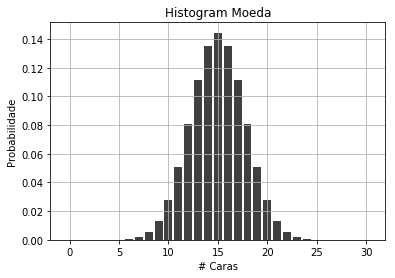

In [12]:
# Cálculo analítico baseado na probabilidade básica
probabilidades = np.zeros((31,1))
for i in range(0,31,1):
    probabilidades[i]=combinacao(30,i)*((1/2)**(i))*((1/2)**(30-i))

plt.bar(range(0,31,1),probabilidades[:,0], facecolor='black', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probabilidade')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

In [13]:
print('Soma das probabilidades {}'.format(sum(probabilidades)))

Soma das probabilidades [1.]


Observa-se que, apesar de termos uma solução analítica, continuamos sem certeza quanto aos resultados.

A solução analítica informa as probabilidades do evento, não o resultado em si.

## Probabilidade - Solução numérica - Simulação

O cálculo das probabilidades de eventos complexos pode ser bastante difícil considerando a solução analítica. Soluções analíticas envolvem o conhecimento de análise combinatória e probabilidade.

Em casos em que não sabemos ou não queremos recorrer à solução analítica, podemos usar simulações computacionais para chegarmos aos mesmos resultados. Tais cálculos são chamados simulações de Monte-Carlo.

Neste caso, a probabilida é estimada pela frequência de ocorrências.

Vamos resolver o problema anterior (número de caras em 30 lançamentos) simplesmente simulando e estimando as probabilidades:

### 100 simulações

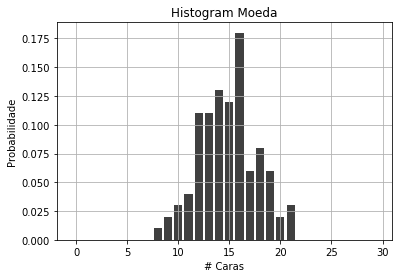

1.0


In [14]:
# Cálculo por simulação - usando probabilidade básica
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 100
np.random.seed(1)
resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='black', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probabilidade')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

print (np.sum(probabilidades))

### 1000 simulações

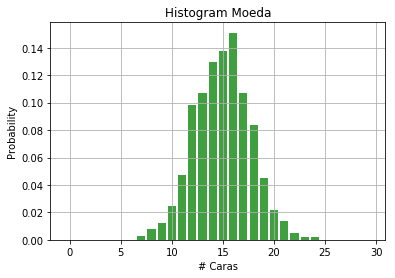

In [15]:
# Cálculo por simulação - usando probabilidade básica
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 1000
np.random.seed(1)
resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

### 10000 simulações

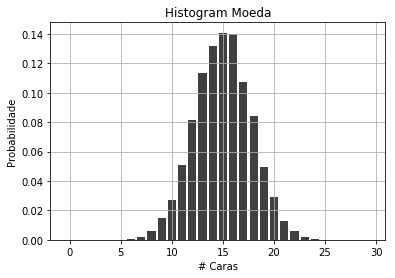

In [16]:
# Cálculo por simulação - usando probabilidade básica
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 10000
np.random.seed(1)
resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='black', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probabilidade')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

### 100000 simulações

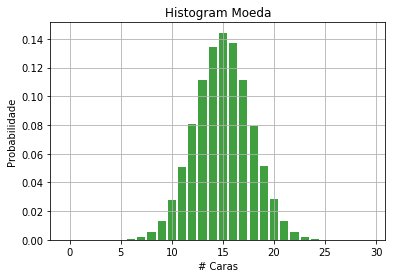

In [17]:
# Cálculo por simulação - usando probabilidade básica
Cara = 1
Coroa = 0
Moeda = [Cara,Coroa]
Equilibrio = [1/2,1/2]
lancamentos = 30
repeticoes = 100000
np.random.seed(1)
resultado = np.random.choice(a=Moeda, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(0,lancamentos+1,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,lancamentos,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probabilidade')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

In [18]:
probabilidades

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-05, 1.0000e-05,
       1.7000e-04, 5.7000e-04, 1.8200e-03, 5.4600e-03, 1.3140e-02,
       2.7930e-02, 5.1070e-02, 8.0490e-02, 1.1124e-01, 1.3447e-01,
       1.4436e-01, 1.3700e-01, 1.1150e-01, 7.9100e-02, 5.1640e-02,
       2.8300e-02, 1.3300e-02, 5.5000e-03, 2.1900e-03, 5.5000e-04,
       1.4000e-04, 4.0000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00])

Com o aumento do número de simulações o resultado numérico converge para o resultado analítico

<font size="3" color="blue">Exercício: Se quiséssemos simular o lançamento de dois dados para verificar as probabilidades da soma dos valores, como ficaria o código acima?</font>

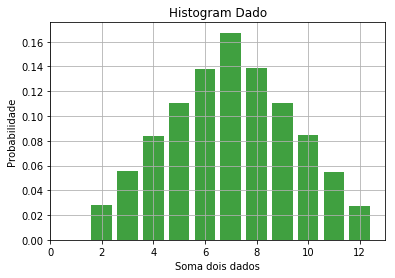

In [19]:
Dado = [1,2,3,4,5,6]
Equilibrio = [1/6,1/6,1/6,1/6,1/6,1/6]
lancamentos = 2
repeticoes = 100000
np.random.seed(1)
#Simula 100000 lançamentos de dois dados e soma, em cada um dos 100000 lançamentos, os resultados obtidos pelos 2 dados
resultado = np.random.choice(a=Dado, p=Equilibrio, replace=True, size=(repeticoes,lancamentos))
resultado=np.sum(resultado, axis=1)
probabilidades,_ = np.histogram(a=resultado, density=True, bins=range(1,14,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(1,13,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('Soma dois dados')
plt.ylabel('Probabilidade')
plt.title('Histogram Dado')
plt.grid(True)
plt.show()

# Probabilidade - Teoria

Probabilidade é a frequência, no longo prazo, de determinado resultado de um processo estocástico.

Por exemplo, o lançamento de uma moeda "honesta", realizado várias vezes, produzirá um número de caras e coroas idêntico, ou seja, a frequência de caras será igual à de coroas (50%), que corresponde à probabilidade de obter uma cara ou uma coroa em qualquer lançamento (0,5). 

Probabilidade é, então, a medida de certeza com que podemos esperar a ocorrência de determinado evento, resultado de um experimento aleatório. 

A probabilidade recebe um número no intervalo de zero a um. Já a frequência e apresentada como percentual, variando de 0 a 100.

A probabilidade não dá certeza alguma sobre um evento específico, apenas garante que, no longo prazo, a frequência se aproximará da probabilidade.

Conforme demonstrado no exemplo anterior, quanto maior o número de experimentos, mais a frequência irá se aproximar da probabilidade real. 

# Probabilidade - Variáveis aleatórias

Variável aleatória (X) é o resultado de <font color="red">uma execução</font> de um processo estocástico. Por exemplo, o resultado de um lançamento de um dado é uma variável aleatória. Cada lançamento representa uma variável aleatória X.

A variável aleatória pode assumir um conjunto de valores (xi), que formam o <font color="red">espaço amostral</font> da variável X. No lançamento do dado, os valores possíveis são os números de 1 a 6. A esse espaço amostral, representado por todos os valores possíveis de serem assumidos pela variável aleatória, designamos, geralmente, pela letra Omega,

A cada valor possível da variável aleatória, ou seja, a cada ponto do espaço amostral, podemos associar uma probabilidade, que é a frequência, no longo prazo, que a variável assumirá tal valor. No lançamento do dado (honesto), cada valor possível no espaço amostral tem probabilidade 1/6. 

Ao conjunto de probabilidades associadas aos valores possíveis, chamamos de <font color="red">distribuição de probabilidade</font> da variável aleatória X.

Quando o espaço amostral é finito ou infinito enumerável é chamado espaço discreto (variável aleatória discreta), por exemplo o lançamento de um dado.

Se o espaço amostral é infinito não-enumerável, é chamado espaço não-discreto ou contínuo (variável aleatória contínua), por exemplo a temperatura medida em cada dia do ano.



# Probabilidade - Conceitos

Evento é um sub conjunto qualquer do espaço amostral, por exemplo, o resultado do lançamento do dado der valores 1 ou 2.

A probabilidade do evento é a soma das probabilidades dos pontos do conjunto

A probabilidade da união de dois eventos (OU), ex. probabilidade do dado dar resultado maior que 5 OU menor que 2, é a soma das probabilidades dos dois eventos menos a probabilidade da interseção. Se os eventos são independentes, basta somar as probabilidades.

A probabilidade da interseção de dois eventos (E), ex. probabilidade do dado dar resultado maior que 5 E menor que 2, é a probabilidade do evento A, dado que B ocorreu, vezes a probabilidade do evento B Se os eventos são independentes, basta multiplicar as probabilidades.



<font size="6" color="red">Distribuições de probabilidade</font>

## Probability Mass Function (PMF) e Probability Density Function (PDF)

Conforme exposto, é a função que associa a cada valor possível de uma variável aleatória uma probabilidade.

Caso a variável seja discreta, teremos uma <b>PMF</b>, caso a variável seja contínua, teremos uma <b>PDF</b>.

ATENÇÃO: a PMF dá a probabilidade de um ponto do espaço amostral, a PDF dá a probabilidade num intervalo, considerando que, para variáveis contínuas, a probabilidade de cada ponto é zero. Entretanto, as funções em python que implementam a PDF estimam a probabilidade do ponto pela probabilidade do intervalo infinitesimal.

Tomando como exemplo a variável aleatória que representa o número de caras obtidas em 30 lançamentos de uma moeda honesta (variável discreta), sua PMF é demonstrada a seguir:

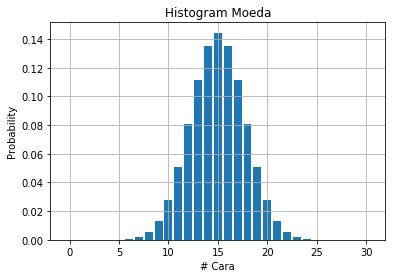

Valor da PMF em 15: 0.14446444809436654, correspondente à probabilidade de 15 caras em 30 lançamentos
Valor da PMF em 0: 9.313225746154793e-10, correspondente à probabilidade de 0 caras em 30 lançamentos
Soma das probabilidades 0.9999999999999932


In [20]:
# Usando scipy

from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pmf(range(0,31,1))

plt.bar(range(0,31,1),resultado)

plt.xlabel('# Cara')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

print('Valor da PMF em 15: {}, correspondente à probabilidade de 15 caras em 30 lançamentos'.format(rv.pmf(15)))
print('Valor da PMF em 0: {}, correspondente à probabilidade de 0 caras em 30 lançamentos'.format(rv.pmf(0)))
print('Soma das probabilidades {}'.format(sum(resultado)))

 A PMF da distribuição mostra que, em 14,45% das vezes que lançarmos 30 vezes uma moeda, obteremos 15 caras.
 
 Mostra também que, em 0,0000000931% das vezes, obteremos zero caras. Um evento pouco provável, mas possível.

## Função de probabilidade acumulada: Cumulative Distribution Function (CDF)

É a probabilidade da variável aleatória assumir um valor menor ou igual à x.

Tomando como exemplo a variável aleatória que representa o número de caras obtidas em 30 lançamentos de uma moeda honesta (variável discreta), sua CDF é demonstrada a seguir:

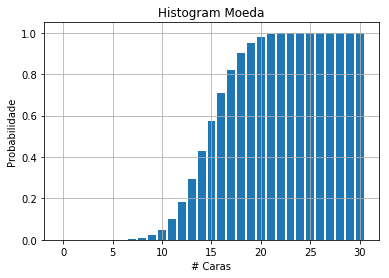

Probabilidade de conseguirmos 15 ou menos caras 0.5722322240471841


In [21]:
# Usando scipy

from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

# calcula probabilide de obter 0,1,2,...30 ou menos caras em 30 lançamentos
resultado = rv.cdf(range(0,31,1))

plt.bar(range(0,31,1),resultado)

plt.xlabel('# Caras')
plt.ylabel('Probabilidade')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

print('Probabilidade de conseguirmos 15 ou menos caras {}'.format(rv.cdf(15)))


 A CDF da distribuição mostra que há 57,22% de probabilidade da moeda produzir 15 ou menos caras em 30 lançamentos.

## Outras funções de probabilidade

Além da PMF, PDF e CDF, podemos citar:

-Survival function: 1-CDF

-Interval: pontos da PMF que delimitam um percentual das probabilidades (ver exemplo a seguir)

In [22]:
# Usando scipy

from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

resultado = rv.cdf(range(0,31,1))

# Calcula o interval, em número de caras, para o qual intervalo temos 95% de certeza de acertar o resultado
intervalo = rv.interval(0.95)

print('Com 95% de chance teremos entre {} e {} caras em 30 lançamentos'.format(intervalo[0],intervalo[1]))


Com 95% de chance teremos entre 10.0 e 20.0 caras em 30 lançamentos


## Medidas de tendência, dispersão e dependência para variáveis aleatórias

São medidas baseadas nos pontos do espaço amostral e na probabilidade de cada ponto.

Em estatística descritiva temos medidas semelhante, só que, como não há informações sobre as probabilidades básicas, os cálculos serão diferentes, não tomando como base as probabilidades (podem usar frequências).

Esperança ou média de X, E(X) - é uma medida de tendência calculada como a soma dos produtos de cada x do espaço amostral pela probabilidade p(x)

Variância de X - é uma medida de dispersão calculada como a esperança do quadrado da diferença entre x e a média

Desvio padrão de X - é uma medida de dispersão calculada como a raiz quadrada da variância. É mais usada como medida de dispersão por estar na mesma unidade da variável X

Dadas duas variáveis aleatórias X e Y, define-se como medida de dependência entre elas a covariância e o coeficiente de correlação, que serão estudadas na estatística descritiva.

In [23]:
from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

media = rv.mean()

print('Média {}'.format(media))

variancia = rv.var()

print('Variância {}'.format(variancia))

desvio_padrao = rv.std()

print('Desvio padrão {}'.format(desvio_padrao))

prob_media = rv.pmf(media)

print('Probabilidade da média {} é {}'.format(media,prob_media))

desv = (rv.cdf(media+desvio_padrao)-rv.cdf(media-desvio_padrao))

print('Probabilidade do resultado estar afastado até 1 desvio padrão da média é {}'.format(desv))

Média 15.0
Variância 7.5
Desvio padrão 2.7386127875258306
Probabilidade da média 15.0 é 0.14446444809436654
Probabilidade do resultado estar afastado até 1 desvio padrão da média é 0.638405391946435


# Distribuições de probabilidade

Fonte: http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

<img src="http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png" height="800" width="800"> 

# Distribuições discretas

Bernoulli - distribuição que representa uma escolha binária, com probabilidades p e 1-p. Como exemplo um lançamento de uma moeda.

Binomial - representa a soma de sucessos em n execuções de um processo binário. Como exemplo o número de caras em n lançamentos de uma moeda. Outro exemplo é o número de bolas pretas retiradas de um cesto contendo bolas brancas e pretas (com reposição).

Hipergeométrica - representa a soma de bolas pretas retiradas de um cesto contendo bolas brancas e pretas (sem reposição).

Poisson - número de chamdas recebidas num intervalo de tempo.

Discrete Uniform - cada ponto do espaço tem igual probabilidade. Como exemplo o lançamento de um dado.

Geométrica - número de fracassos antes de um sucesso. Por exemplo, no lançamento de moeda, o número de coroas antes de uma cara.

Binomial negativa - número de fracassos antes de n sucessos

Uniform

# Distribuições contínuas

Exponencial - tempo decorrido entre chamadas de um call center, com taxa de chamadas constante.

Weibull - tempo até falha, quando a taxa de falha não é constante no tempo.

Chi2 - soma de quadrados de valores normalmente distribuídos

Gama - tempo até n eventos ocorrerem

Normal (Gaussiana) - soma de variáveis aleatórias

Log-normal - utilizada quando o logarítmo dos valores é distribuído segundo a normal. Produto de variáveis aleatórias

Uniform

# Qui-Quadrado

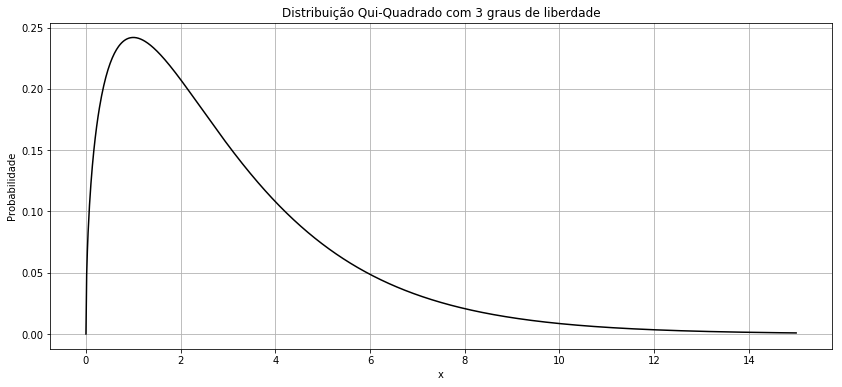

In [24]:
from scipy.stats import chi2
graus = 3
rv = chi2(graus)
x = np.linspace(0,15,1000)
# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(x)
plt.subplots(figsize=(14,6))
plt.plot(x,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Qui-Quadrado com 3 graus de liberdade')
plt.grid(True)
plt.show()

# Cauchy

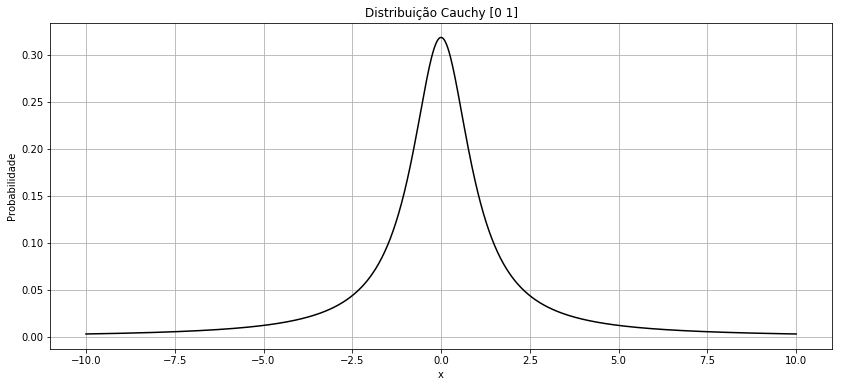

In [25]:
from scipy.stats import cauchy
tentativas = 30
rv = cauchy()
x = np.linspace(-10,10,1000)
# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(x)
plt.subplots(figsize=(14,6))
plt.plot(x,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Cauchy [0 1]')
plt.grid(True)
plt.show()

# Uniforme

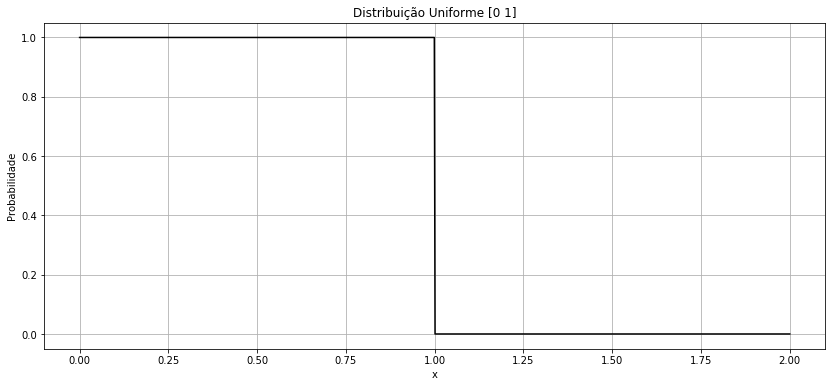

In [26]:
from scipy.stats import uniform
tentativas = 30
rv = uniform()
x = np.linspace(0,2,1000)
# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(x)
plt.subplots(figsize=(14,6))
plt.plot(x,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Uniforme [0 1]')
plt.grid(True)
plt.show()

# Distribuição binomial

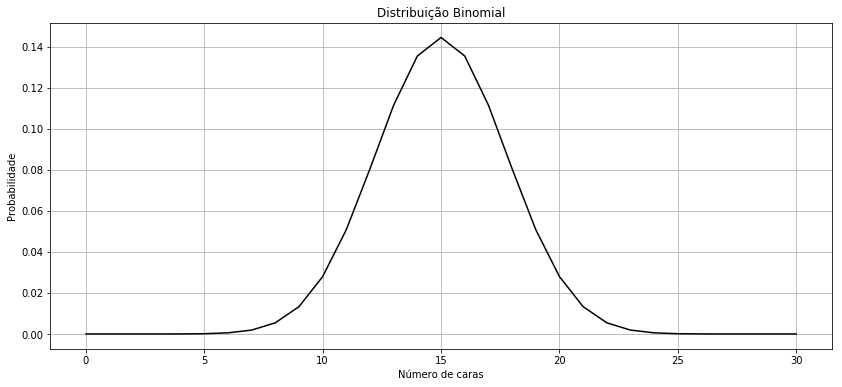

In [27]:
from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pmf(range(0,31,1))
plt.subplots(figsize=(14,6))
plt.plot(range(0,31,1),resultado, color='black')

plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial')
plt.grid(True)
plt.show()

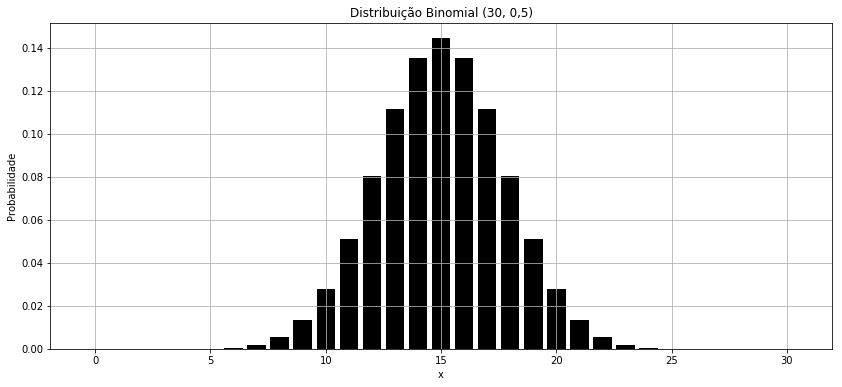

In [28]:
from scipy.stats import binom
tentativas = 30
rv = binom(tentativas, 1/2)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pmf(range(0,31,1))
plt.subplots(figsize=(14,6))
plt.bar(range(0,31,1),resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial (30, 0,5)')
plt.grid(True)
plt.show()

# Bernoulli

In [29]:
# Poisson

from scipy.stats import bernoulli

rv = bernoulli(0,4)



# Gama

/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2714: RuntimeWarning: divide by zero encountered in power
  return np.log(abs(c)) + sc.xlogy(c*a - 1, x) - x**c - sc.gammaln(a)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2714: RuntimeWarning: invalid value encountered in subtract
  return np.log(abs(c)) + sc.xlogy(c*a - 1, x) - x**c - sc.gammaln(a)


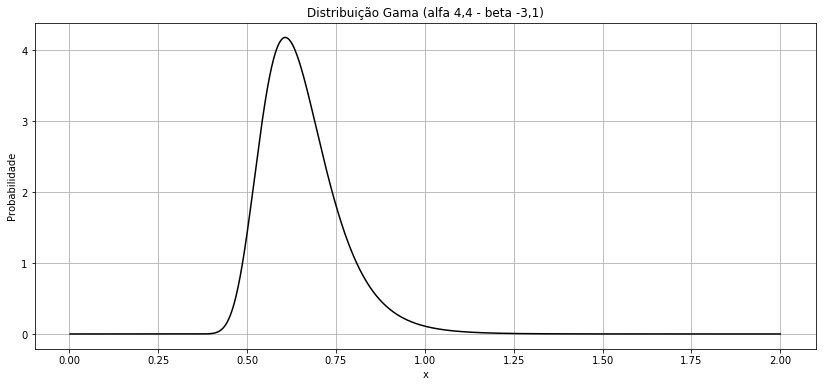

In [30]:
# Poisson

from scipy.stats import gengamma
graus = 30
a, c = 4.42, -3.12
rv = gengamma(a, c)
variacao = np.linspace(0,2,1000)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(variacao)
plt.subplots(figsize=(14,6))
plt.plot(variacao,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Gama (alfa 4,4 - beta -3,1)')
plt.grid(True)
plt.show()

# t-Student

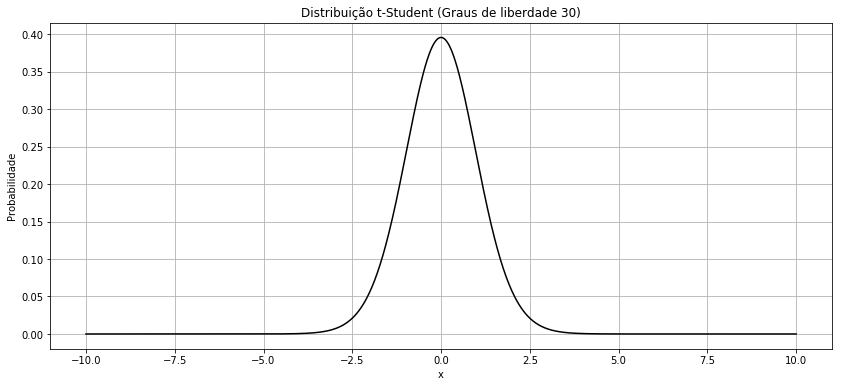

In [31]:
# t-Student

from scipy.stats import t
graus = 30
rv = t(graus)
variacao = np.linspace(-10,10,1000)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(variacao)
plt.subplots(figsize=(14,6))
plt.plot(variacao,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição t-Student (Graus de liberdade 30)')
plt.grid(True)
plt.show()

# Poisson

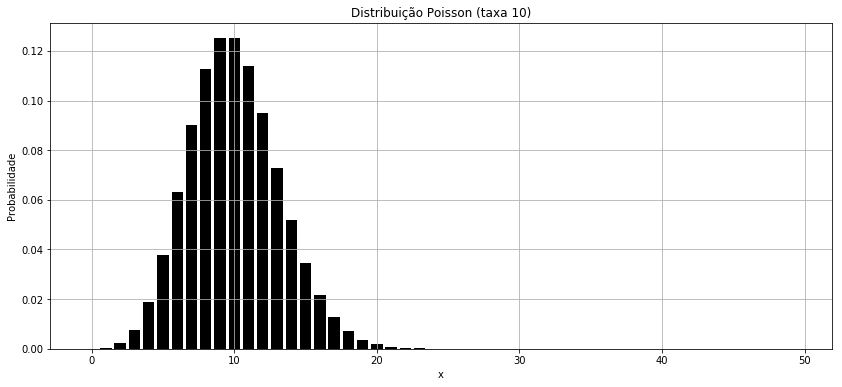

In [32]:
# Poisson

from scipy.stats import poisson
taxa = 10
rv = poisson(taxa)
variacao = range(0,50,1)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pmf(variacao)
plt.subplots(figsize=(14,6))
plt.bar(variacao,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Poisson (taxa 10)')
plt.grid(True)
plt.show()

# Exponencial

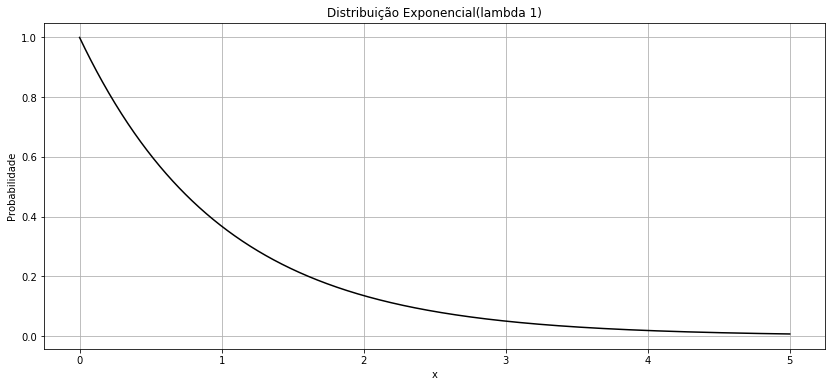

In [33]:
# Exponencial

from scipy.stats import expon
lambda_ = 1 # taxa
rv = expon( scale=lambda_)


variacao = np.linspace(0,5,1000)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(variacao)
plt.subplots(figsize=(14,6))
plt.plot(variacao,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Exponencial(lambda 1)')
plt.grid(True)
plt.show()

## Distribuição Normal (Gaussiana)

Pela importância, vamos estudar algumas propriedades da normal

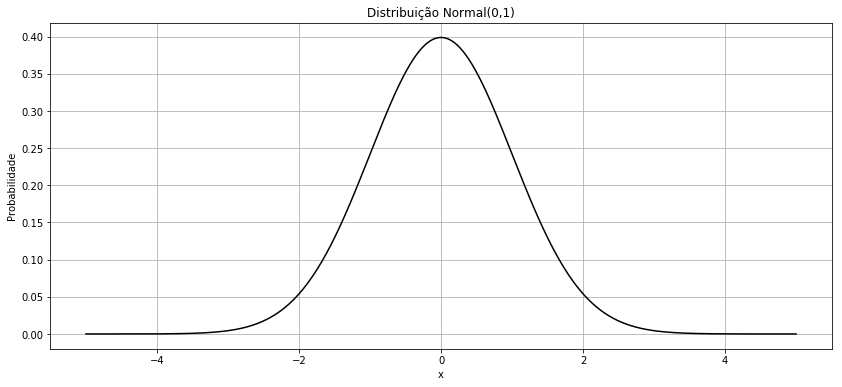

In [34]:
# Poisson

from scipy.stats import norm
mean = 0
std = 1
rv = norm(loc=mean, scale=std)


variacao = np.linspace(-5,5,1000)

# calcula probabilide de obter 0,1,2,...30 caras em 30 lançamentos
resultado = rv.pdf(variacao)
plt.subplots(figsize=(14,6))
plt.plot(variacao,resultado, color='black')

plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Normal(0,1)')
plt.grid(True)
plt.show()

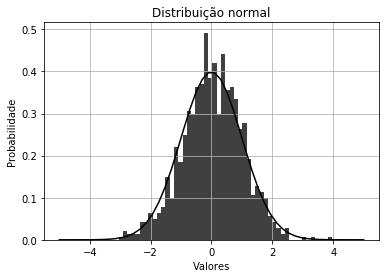

In [35]:
# Normal
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm


from scipy.stats import norm
from scipy.stats import kstest

mean = 0
std = 1
rv = norm(loc=mean, scale=std)
np.random.seed(1)
resultado = rv.rvs(size=1000)

n, bins, patches = plt.hist(resultado, density=True, facecolor='black', alpha=0.75, bins=50)
intervalo = np.linspace(mean-5*std,mean+5*std, num=50)

plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')
plt.xlabel('Valores')
plt.ylabel('Probabilidade')

plt.title('Distribuição normal')
plt.grid(True)
plt.show()

In [36]:
print('Probabilidade do valor 0: {}'.format(rv.pdf(0)))
print('Probabilidade de valor menor ou igual a 0: {}'.format(rv.cdf(0)))
print('Média: {}'.format(rv.mean()))
print('Mediana: {}'.format(rv.median()))
print('Variância: {}'.format(rv.var()))
print('Desvio padrão: {}'.format(rv.std()))


Probabilidade do valor 0: 0.3989422804014327
Probabilidade de valor menor ou igual a 0: 0.5
Média: 0.0
Mediana: 0.0
Variância: 1.0
Desvio padrão: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f682e06a748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f682e06add8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f682e06a588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f682e0a64a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f682e0a67f0>],
 'means': []}

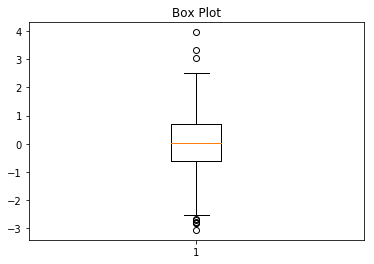

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot(resultado)

In [38]:

tamanho_amostra = (len(resultado))

tamanho_amostra_entre_1_desvios = sum( (resultado>(mean-1*std)) & (resultado<(mean+1*std)) )
tamanho_amostra_entre_2_desvios = sum( (resultado>(mean-2*std)) & (resultado<(mean+2*std)) )
tamanho_amostra_entre_3_desvios = sum( (resultado>(mean-3*std)) & (resultado<(mean+3*std)) )

print('Percentual dos dados entre {} desvios: {}'.format(1,tamanho_amostra_entre_1_desvios*100/tamanho_amostra))
print('Percentual dos dados entre {} desvios: {}'.format(2,tamanho_amostra_entre_2_desvios*100/tamanho_amostra))
print('Percentual dos dados entre {} desvios: {}'.format(3,tamanho_amostra_entre_3_desvios*100/tamanho_amostra))

Percentual dos dados entre 1 desvios: 69.9
Percentual dos dados entre 2 desvios: 95.6
Percentual dos dados entre 3 desvios: 99.6


In [39]:
# Determinação de parâmetros baseado nos dados

media, desvio = norm.fit(resultado)

In [40]:
#https://plot.ly/python/normality-test/

# Teste de normalidade
    
kstest(resultado, 'norm')


KstestResult(statistic=0.03490354236588722, pvalue=0.17088563112849203)

## Distribuição Log-Normal

Em que pese a importância da normal, muitos processos seguem distribuições exponenciais ou lognormais

A log-normal é particularmente interessante por duas propriedades:

-Representa a distribuição da multiplicação de variáveis aleatórias

-Representa a distribuição de variáveis cujo log tem distribuição normal

In [41]:

s = 0.3
repeticoes = 100000

rv = stat.lognorm(s=s)

populacao = rv.rvs(size=repeticoes, random_state=random_state)

print('Média: {}'.format(rv.mean()))
print('Mediana: {}'.format(rv.median()))
print('Variância: {}'.format(rv.var()))
print('Desvio padrão: {}'.format(rv.std()))

Média: 1.046027859908717
Mediana: 1.0
Variância: 0.10304307941659988
Desvio padrão: 0.3210032389503257


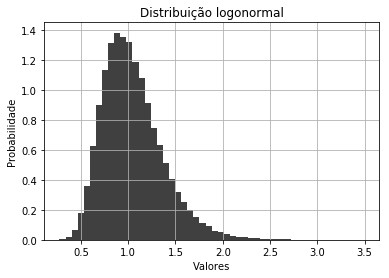

In [42]:
n, bins, patches = plt.hist(populacao, density=True, facecolor='black', alpha=0.75, bins=50)


plt.title('Distribuição logonormal')
plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f682e2b2438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f682e2b2b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f682e2b22e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f682e2be1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f682e2be518>],
 'means': []}

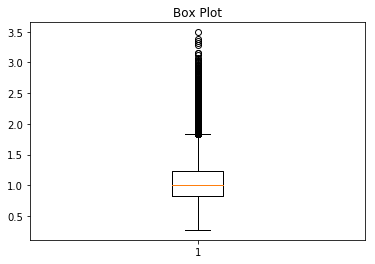

In [43]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot(populacao)

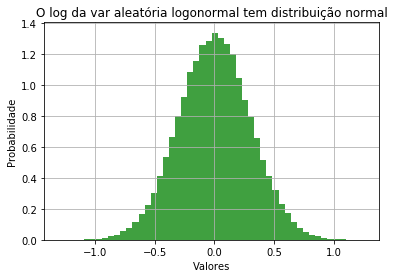

In [44]:
n, bins, patches = plt.hist(np.log(populacao), density=True, facecolor='g', alpha=0.75, bins=50)


plt.title('O log da var aleatória logonormal tem distribuição normal')
plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

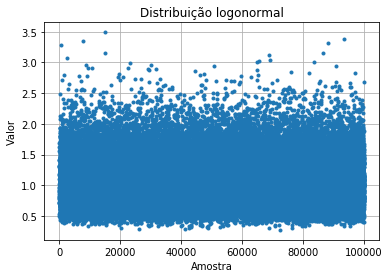

In [45]:
plt.plot(populacao,'.')

plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Distribuição logonormal')
plt.grid(True)
plt.show()

<font size="6" color="red">Conceitos de estatística</font>



Estatística é a ciência que se dedica à coleta, análise e interpretação de dados (https://pt.wikipedia.org/wiki/Estatística)

É utilizada quando não conhecemos as probabilidades básicas do processo estocástico em análise, temos apenas os dados gerados na execução do processo.

Por exemplo, no lançamento de moeda não honesta, sobre a qual não conhecemos as probabilidades de Cara e Coroa, podemos registrar o resultado de n lançamentos e realizar análise estatística sobre esses dados.

O ramo da estatística que analisa, descreve e sumariza um conjunto de dados é a **<b>estatística descritiva</b>**.



<b>População</b> é o conjunto de dados representando todas as observações possíveis, <b>amostra</b> é o conjunto de dados representando apenas uma parte dessas observações. 

Valores calculados a partir da população são chamados parâmetros populacionais. Quando esses mesmos valores são calculados a partir da amostra denominam-se estatísticas amostrais.

<b>Inferência estatística</b> significa inferir fatos acerca de uma população a partir de resultados observados na amostra. 

Quando inferimos fatos sobre a população normalmente não apresentamos simplesmente o valor, informamos também nosso grau de certeza e o intervalo de confiança (ex. pesquisa eleitoral)

## Exemplo: Análise estatística sobre o número de caras em n lançamentos de Moeda

O processo estocástico é o lançamento da moeda e a contagem no número de caras em 30 lançamentos

Supomos que não conhecemos os parâmetros do processo (qual probabilidade de cara/coroa), temos apenas amostras

In [46]:
# Geração da população, esta parte é desconhecida para o estatístico

lancamentos = 30
repeticoes = 100000
np.random.seed(1)
populacao = np.random.binomial(30, 1/4, size=repeticoes)



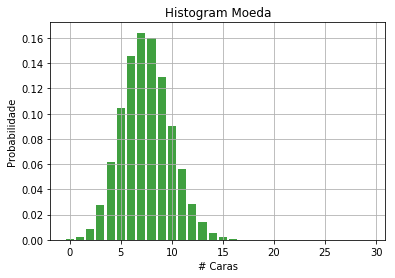

Média: 7.49408
Probabilidade Cara: 0.24980266666666667


In [47]:
# Estatística descritiva da população

probabilidades,_ = np.histogram(a=populacao, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probabilidade')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

print('Média: {}'.format(np.mean(populacao)))
print('Probabilidade Cara: {}'.format(np.mean(populacao)/lancamentos))

Analisando a população, concluímos que a probabilidade básica da moeda gerar uma cara é 0,25.

Normalmente não possuímos dados sobre toda a população (pode ser caro obter tais dados, o processo de amostragem ser destrutivo, não haver tempo para captura, etc). Neste caso temos que extrair uma amostra da população e, com base na análise da amostra, inferir conclusões sobre toda a população:


In [48]:
# Amostra de 1% da população
amostra = populacao[np.random.randint(0, len(populacao),int(0.01*repeticoes))]

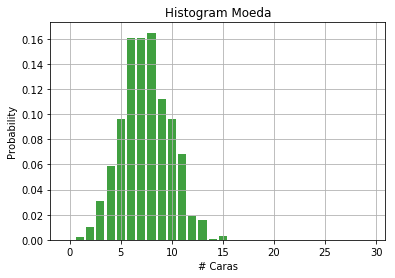

Média: 7.455
Probabilidade Cara: 0.2485


In [49]:
# Estatística descritiva da amostra

probabilidades,_ = np.histogram(a=amostra, density=True, bins=range(0,31,1))

#n, bins, patches = plt.hist(resultado, density=True, facecolor='g', alpha=0.75, bins=range(0,31,1))
plt.bar(range(0,30,1),probabilidades, facecolor='g', alpha=0.75)

plt.xlabel('# Caras')
plt.ylabel('Probability')
plt.title('Histogram Moeda')
plt.grid(True)
plt.show()

print('Média: {}'.format(np.mean(amostra)))
print('Probabilidade Cara: {}'.format(np.mean(amostra)/lancamentos))

Com base na amostra, calculamos que a probabilidade de Cara é 0,253, bem próxima da probabilidade real de 0,25.

A questão a ser definida é o quanto a informação obtida na amostra está próxima da informação da população e qual tamanho da amostra é necessário para termos confiânça sobre nossas conclusões. Para isso, temos que entender o <b>Teorema do Limite Central</b>.

Antes, porém, vamos estudar a estatística descritiva. Após, no estudo da inferência estatística, veremos o teorema.

<font size="6" color="red">Estatística Descritiva - Conceitos básicos</font>



Conforme já definido, é o ramo da estatística que analisa, descreve e sumariza um conjunto de dados.

<b>Os dados capturados podem ser calssificados como:</b>

-Qualitativos nominais (não numéricos, sem ordem) - ex. sexo

-Qualitativos ordinais (não numéricos, com ordem) - ex. grau de instrução

-Quantitativos contínuos (numéricos não intervalados) - ex. salário

-Quantitativos discretos (numéricos intervalados) - ex. número de filhos


<br>Da mesma forma que na análise probabilística, dados qualitativos ordinais (representados como quantitativos) e dados quantitativos podem ser analisados segundo medidas de posição e dispersão, que podem ser aplicadas tanto à população (parâmetros populacionais) como à amostra (estatísticas amostrais).

<b>São medidas de posição: </b>

Moda (valor mais frequente - não funciona corretamente em distribuições contínuas), 

Média (soma de m valores dividida por m), 

Mediana (valor na posição central de um conjunto ordenado) e 

Quartis (reqpresentam as posições 25%-Q1, 50%-Q2 e 75%-Q3)


<b>São medidas de dispersão: </b>

Amplitude (máximo-mínimo), 

Intervalo-Interquartil (Q3-Q1), 

Variância (média dos quadrados das diferenças entre a variável e a média), 

Desvio Padrão (raiz da variância) e 

Coeficiente de Variação (desvio padrão dividido pela média)


<b>São medidas de forma: </b>

Curtose (achatamento, onde 0 caracteriza a normal, maior que 0 representa afunilamento e menor que 0 achatamento) e 

Assimetria (skewness, onde 0 caracteriza simetria, maior que 0 caracteriza maior distribuição à direira e menor que 0 caracteriza maior distribuição à esquerda)

<br><b>IMPORTANTE</b>: mediadas de posição e dispersão são relevantes para entendermos os dados em análise, porém, a melhor forma de termos uma visão completa é através das distribuições de frequências, obtidas através do histograma.

<br><b>IMPORTANTE</b>: para ter uma visão consolidade das mediadas de posição e dispersão usar o boxplot.

In [50]:

repeticoes = 100000
mean = 5
np.random.seed(1)

# População lognormal
s = 0.8
rv_lognorm = stat.lognorm(s=s,loc=mean-1.3)
populacao_lognorm = rv_lognorm.rvs(size=repeticoes, random_state=random_state)

# População normal
std = 1.3
rv_norm = stat.norm(loc=mean, scale=std)
populacao_norm = rv_norm.rvs(size=repeticoes, random_state=random_state)



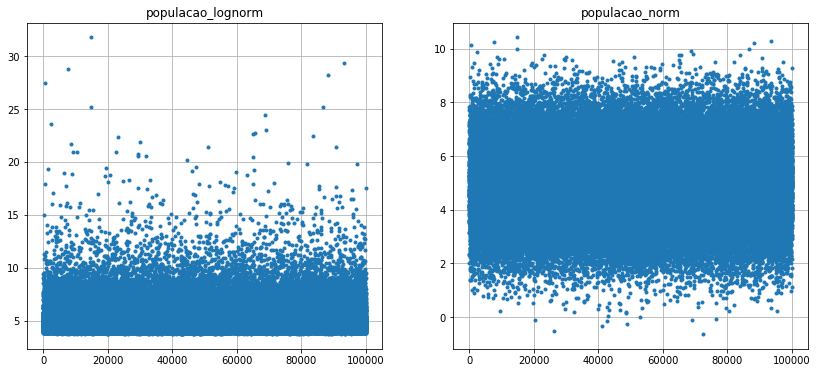

In [51]:




fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].plot(populacao_lognorm,'.')
axs[0].grid(True)
axs[0].set_title('populacao_lognorm')

axs[1].plot(populacao_norm,'.')
axs[1].grid(True)
axs[1].set_title('populacao_norm')

plt.show()

In [52]:
print('\nPopulação lognormal: \nmédia {}, \ndesvio padrão {}, \nmoda {}, \nmediana {}, \nCurtose {}, \nSimetria {}'.format(
    np.mean(populacao_lognorm), 
    np.std(populacao_lognorm),
    stat.mode(populacao_lognorm),
    np.median(populacao_lognorm),
    stat.kurtosis(populacao_lognorm),
    stat.skew(populacao_lognorm)
))


População lognormal: 
média 5.081847138644254, 
desvio padrão 1.307697598118222, 
moda ModeResult(mode=array([3.73138234]), count=array([1])), 
mediana 4.704811851259792, 
Curtose 25.73565531865477, 
Simetria 3.5839715694484697


In [53]:
print('\nPopulação normal: \nmédia {}, \ndesvio padrão {}, \nmoda {}, \nmediana {}, \nCurtose {}, \nSimetria {}'.format(
    np.mean(populacao_norm), 
    np.std(populacao_norm),
    stat.mode(populacao_norm),
    np.median(populacao_norm),
    stat.kurtosis(populacao_norm),
    stat.skew(populacao_norm)
))


População normal: 
média 5.0068289370365875, 
desvio padrão 1.297828055604257, 
moda ModeResult(mode=array([-0.62495346]), count=array([1])), 
mediana 5.0078005057801445, 
Curtose 0.020466431981056132, 
Simetria 0.0004674978962155819


Observe que os dois conjuntos de dados possuem médias e desvios muito parecidos, apesar de serem totalmente diferentes.

Por isso a simples análise dos parâmetros populacionais não é suficiente para se ter uma ideia precisa da população em análise.

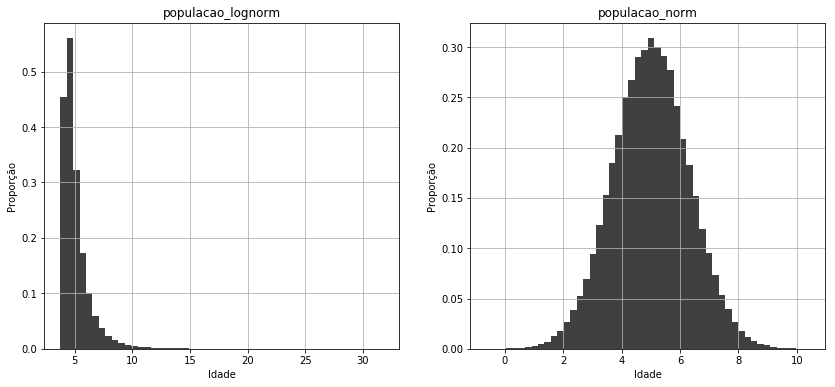

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].hist(populacao_lognorm, density=True, facecolor='black', alpha=0.75, bins=50)
axs[0].grid(True)
axs[0].set_title('populacao_lognorm')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Proporção')

axs[1].hist(populacao_norm, density=True, facecolor='black', alpha=0.75, bins=50)
axs[1].grid(True)
axs[1].set_title('populacao_norm')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Proporção')

plt.show()

A análise das distribuições de frequência permite uma visão muito mais clara da configuração das populações.

### BoxPlot

O BoxPlot traz as seguintes marcas:

-Caixa definida pelo primeiro quartil, mediana e terceiro quartil

-Fios alongados para além da caixa na distância 1,5 X (Q3 - Q1). Para distribuições não simétricas, as medidas inferior e superior do fio são ajustadas, com multiplicadores distintos da relação anterior. Nesses casos, os fios não são simétricos em relação à caixa (Detalhes em https://en.wikipedia.org/wiki/Box_plot).

-Outliers marcados além da extensão do fio

In [55]:
dados = np.concatenate((populacao_lognorm, populacao_norm), 0)
dados = np.reshape(dados,(2,repeticoes))
dados = dados.T


Text(0.5, 1.0, 'Boxplot')

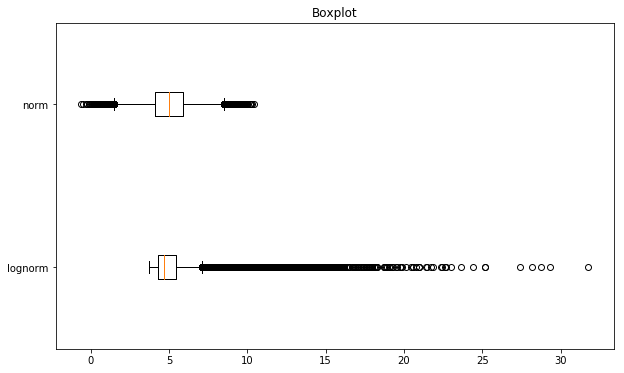

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(10,6))
_ = plt.boxplot(dados,vert =False, labels =['lognorm','norm'], meanline =True)
plt.title('Boxplot')

## Teste de normalidade

Muitos métodos em estatística partem do princípio que a distribuição dos dados é normal.

Para que sejam usados com segurança é importante testar os dados quanto à normalidade.

Uma das formas mais efetivas é o qqplot.

Fonte: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

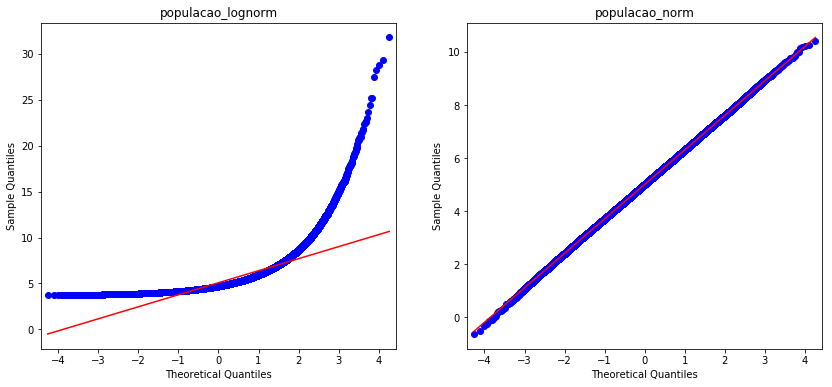

In [57]:
from statsmodels.graphics.gofplots import qqplot

fig, axs = plt.subplots(1, 2, figsize=(14,6))

qqplot(populacao_lognorm, line='s', ax=axs[0])
axs[0].set_title('populacao_lognorm')

qqplot(populacao_norm, line='s', ax=axs[1])
axs[1].set_title('populacao_norm')

plt.show()



## Observação sobre o cálculo da variância (correção de bessel)

Sendo a variância uma média, o esperado seria a divisão por n (número de elementos na amostra)

Entretanto, tal divisão torna o estimador tendencioso, sendo correto dividir por n-1.

Caso n seja muito grande, tal diferença é imperceptível, para amostras menores o valor fica evidente.

Em numpy usar o parâmetro ddof=1.

Vamos ao exemplo:

In [58]:
repeticoes = 100000
mean = 5

# População lognormal
s = 0.8
rv_lognorm = stat.lognorm(s=s,loc=mean-1.3)
populacao_lognorm = rv_lognorm.rvs(size=repeticoes, random_state=random_state)

amostra_1000 = populacao_lognorm[np.random.randint(0, len(populacao_lognorm),1000)]
amostra_100 = populacao_lognorm[np.random.randint(0, len(populacao_lognorm),100)]
amostra_10 = populacao_lognorm[np.random.randint(0, len(populacao_lognorm),10)]

print('Desvios real {}\n'.format(rv_lognorm.std()))

print('\nDesvios amostra 1000 sem correção {}'.format(np.std(amostra_1000)))
print('Desvios amostra 1000 com correção {}'.format(np.std(amostra_1000, ddof =1)))

print('\nDesvios amostra 100 sem correção {}'.format(np.std(amostra_100)))
print('Desvios amostra 100 com correção {}'.format(np.std(amostra_100, ddof =1)))

print('\nDesvios amostra 10 sem correção {}'.format(np.std(amostra_10)))
print('Desvios amostra 10 com correção {}'.format(np.std(amostra_10, ddof =1)))

Desvios real 1.3039013943793185


Desvios amostra 1000 sem correção 1.2889872997115075
Desvios amostra 1000 com correção 1.289632277134762

Desvios amostra 100 sem correção 1.7494897450393079
Desvios amostra 100 com correção 1.758303351172702

Desvios amostra 10 sem correção 0.5089132203271154
Desvios amostra 10 com correção 0.5364416358682618


<font size="6" color="red">Inferência Estatística</font>



Conforme já descrito, a inferência estatística busca estender para a população informações obtidas na amostra.

Para tratarmos de inferência, é preciso primeiro estudar o teorema do limite central.

<font size="6" color="red">Teorema do limite central</font>



O teorema estabelece que a distribuição da soma de variáveis aleatórias <b>iid (independentes e identicamente distribuídas)</b> tende para uma distribuição normal, independente da distribuição original das variáveis. (Fonte: https://en.wikipedia.org/wiki/Central_limit_theorem)

Para compreender melhor o significado do teorema, vamos a um exemplo:

Vamos considerar 100.000 doações feitas para um candidato, cujo valor mínimo de doação foi estabelecido em R$ 48.

O comportamento esperado é que a grande maioria faça a contribuição mínima.

Haverá, porém, contribuições acima do mínimo, em valores diversos e quantidades reduzidas.

Com isso, temos uma distribuição semelhante a uma log-normal ou exponencial, veja o gráfico.

In [59]:
# Vamos criar uma população distribuída de forma lognormal


repeticoes = 100000
mean = 50

# População lognormal
s = 0.9
np.random.seed(1)
rv_lognorm = stat.lognorm(s=s,loc=mean)
populacao_lognorm = rv_lognorm.rvs(size=repeticoes, random_state=random_state)

escolhas = [0,1]
sexo_doadores = random.choices(population=escolhas, weights=[6/10,4/10], k=repeticoes)
sexo_doadores = np.asarray(sexo_doadores, dtype=np.int)




Mínimo 50.0203596851346
Máximo 92.5766469865867
Média 51.50502181456898
Desvio 1.6794273676283902
Var 2.8204762831392243


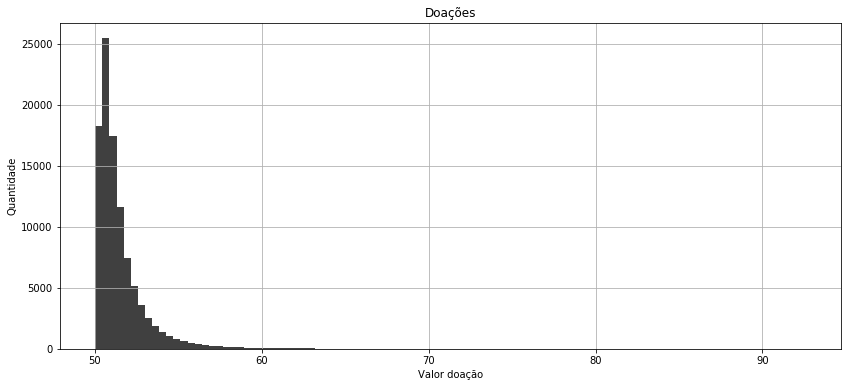

In [60]:



print('Mínimo {}'.format(np.min(populacao_lognorm)))
print('Máximo {}'.format(np.max(populacao_lognorm)))
print('Média {}'.format(np.mean(populacao_lognorm)))
print('Desvio {}'.format(np.std(populacao_lognorm)))
print('Var {}'.format(np.var(populacao_lognorm)))

fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(populacao_lognorm, density=False, facecolor='black', alpha=0.75, bins=100)
axs.set_xlabel('Valor doação')
axs.set_ylabel('Quantidade')
axs.grid(True)
axs.set_title('Doações')


plt.show()

In [61]:

p = np.sum(sexo_doadores)/repeticoes
p

0.39817

In [62]:
p*(1-p)

0.2396306511

In [63]:
np.var(sexo_doadores)

0.23963065110000004

De toda a "população" de doações, vamos retirar várias amostras para estudar seu comportamento.

Observação: Numa situação real, seria extraída apenas uma amostra.

In [64]:
tamanho_amostra = 1000
selecionados = np.random.randint(0, len(populacao_lognorm),tamanho_amostra)


In [65]:

amostra_sexo_doadores = sexo_doadores[selecionados]
np.sum(amostra_sexo_doadores)/tamanho_amostra

0.396

In [66]:

amostra = populacao_lognorm[selecionados]
print('Mínimo {}'.format(np.min(amostra)))
print('Máximo {}'.format(np.max(amostra)))
print('Média {}'.format(np.mean(amostra)))
print('Desvio {}'.format(np.std(amostra)))
print('Desvio {}'.format(np.std(amostra, ddof =1)))
print('Var {}'.format(np.var(amostra, ddof =1)))

print('Raiz tamanho {}'.format(np.sqrt(tamanho_amostra)))
print('Desvio / Raiz tamanho {}'.format(np.std(amostra, ddof =1)/np.sqrt(tamanho_amostra)))

Mínimo 50.07818597814995
Máximo 64.38469100211745
Média 51.52216946963892
Desvio 1.6391007363222558
Desvio 1.6399209018658607
Var 2.689340564376538
Raiz tamanho 31.622776601683793
Desvio / Raiz tamanho 0.05185885232413592


In [67]:
# Vamos extrair 1000 amostras e calcular suas médias
amostras = 1000
tamanho_amostra = 300
np.random.seed(1)
medias = np.zeros((amostras,1))
variancias= np.zeros((amostras,1))
qtd_sexo_masculino= np.zeros((amostras,1))
percentuais = np.zeros((amostras,1))
for i in range(0,amostras,1):
    medias[i]=np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])
    percentuais[i] = np.sum(sexo_doadores[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])/tamanho_amostra
    qtd_sexo_masculino[i] = np.sum(sexo_doadores[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])
    variancias[i]=np.var(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])


Média das médias das amostras 51.504882698753526
Desvio das médias das amostras 0.09513893159901841


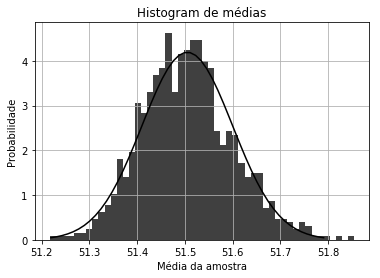

In [68]:
# A distribuição das médias aproxima-se de uma Normal, independente da distribuição original que gerou as amostras
from scipy.stats import norm
n, bins, patches = plt.hist(medias, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média das médias das amostras {}'.format(mean_))
print('Desvio das médias das amostras {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Média da amostra')
plt.ylabel('Probabilidade')
plt.title('Histogram de médias')
plt.grid(True)
plt.show()

In [69]:
def calcula_Z_normal(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

def calcula_Z_tstudent(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

calcula_Z_normal(0.99)

2.5758293035489004

Média das variancias 2.7710469576516963
Desvio das variancias 1.0100312903495507


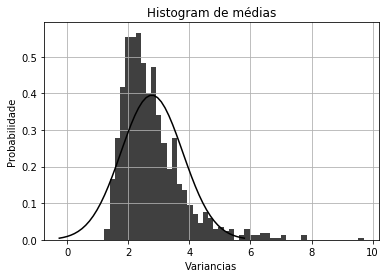

In [70]:
from scipy.stats import norm
n, bins, patches = plt.hist(variancias, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(variancias)
std_ = np.std(variancias)
print('Média das variancias {}'.format(mean_))
print('Desvio das variancias {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Variancias')
plt.ylabel('Probabilidade')
plt.title('Histogram de médias')
plt.grid(True)
plt.show()

Média das proporções das amostras 0.39923000000000003
Desvio das proporções das amostras 0.029437625017427384


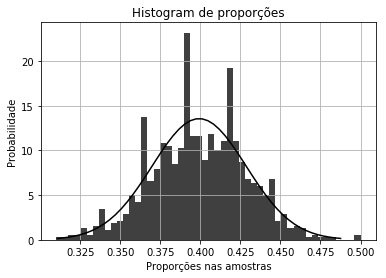

In [71]:
# A distribuição das médias aproxima-se de uma Normal, independente da distribuição original que gerou as amostras
from scipy.stats import norm
n, bins, patches = plt.hist(percentuais, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(percentuais)
std_ = np.std(percentuais)
print('Média das proporções das amostras {}'.format(mean_))
print('Desvio das proporções das amostras {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Proporções nas amostras')
plt.ylabel('Probabilidade')
plt.title('Histogram de proporções')
plt.grid(True)
plt.show()

Média das qtd_sexo_masculino 119.237
Desvio das qtd_sexo_masculino 8.580025116513355


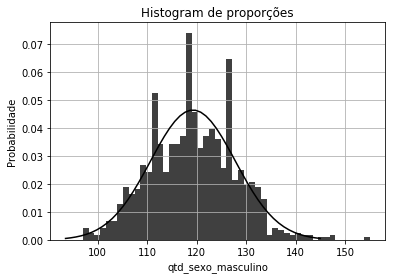

In [72]:
from scipy.stats import norm
n, bins, patches = plt.hist(qtd_sexo_masculino, density=True, facecolor='black', alpha=0.75, bins=50)

mean_ = np.mean(qtd_sexo_masculino)
std_ = np.std(qtd_sexo_masculino)
print('Média das qtd_sexo_masculino {}'.format(mean_))
print('Desvio das qtd_sexo_masculino {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('qtd_sexo_masculino')
plt.ylabel('Probabilidade')
plt.title('Histogram de proporções')
plt.grid(True)
plt.show()

## Intervalo de confiança

Conforme previsto pelo teorema do limite central, a distribuição das médias das amostras (considerando que a média é uma soma de variáveis aleatórias dividida pelo número de elementos) tende para a distribuição normal.

Além disso, a média dessa distribuição tende para a média da população.

Perceba que, apesar da distribuição original das amostras ter distribuição completamente diferente da normal, as médias das amostras tendem à normal.

Uma consequência extremamente importante do teorema é que, dada a distribuição normal, tem-se que, com 95,45% de certeza, a média de qualquer amostra estará a dois desvios padrão da média da população.

No exemplo em questão, teremos:

In [73]:
mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média das médias das amostras {}'.format(mean_))
print('Desvio das médias das amostras {}'.format(std_))
print('Dois desvios {}'.format(2*std_))

print('Intervalo de 95,45% de confiança {} - {}'.format(mean_-2*std_,mean_+2*std_))

Média das médias das amostras 51.504882698753526
Desvio das médias das amostras 0.09513893159901841
Dois desvios 0.19027786319803683
Intervalo de 95,45% de confiança 51.31460483555549 - 51.69516056195156


Reforçando a conclusão acima: podemos garantir com 95,45% de confiança que qualquer amostra terá sua média entre 50,22 e 50,49.

Essa conclusão é válida somente para a população em análise, considerando uma amostra com tamanho 1000.

Para testarmos tal conclusão, vamos verificar a média de dez amostras aleatórias:


In [74]:
np.random.seed(1)
for i in range(0,10,1):
    print('Média da amostra {}: {}'.format(i,
                                np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])))

Média da amostra 0: 51.406997974652036
Média da amostra 1: 51.52020766712772
Média da amostra 2: 51.554762946157716
Média da amostra 3: 51.63801728449061
Média da amostra 4: 51.39795399489473
Média da amostra 5: 51.529962844552486
Média da amostra 6: 51.38910437750536
Média da amostra 7: 51.51936121224594
Média da amostra 8: 51.27378077660185
Média da amostra 9: 51.592735082997656


## Margem de erro

Outra conclusão importante que podemos chegar é a margem de erro.

Antes estávamos trabalhando com várias amostras, calculando a média de cada uma, e concluímos que qualquer amostra, com 95% de chande, terá sua média entre dois desvios padrão da média real da população.

Mas, na vida real, não fazemos várias amostras, temos apenas uma para trabalhar. Com os valores dessa amostra precisamos inferir um valor para a população. Por exemplo, calculando a média da amostra quero inferir a média da população.

Assim, dado o valor da média de uma amostra, podemos estabelecer a margem de erro com 2 desvios padrão para o nível de confiança de 95%. Melhor explicando, dada a média calculada na amostra, se estabelecemos um intervalo com dois desvios padrão, para mais e para menos da média da amostra, podemos afirmar, com 95% de chance, que a média real da população estará nesse intervalo.

Vamos analisar os resultados obtidos acima, considerando a margem de erro e a média real da população (50.36):


In [75]:
np.random.seed(1)
tamanho_amostra = 1000
std_ = np.std(populacao_lognorm)/np.sqrt(tamanho_amostra)
print('Tamanho amostra {}, margem de erro considerando dois desvios {}, média real da população {}'.format(tamanho_amostra,2*std_, np.mean(populacao_lognorm)))
# Vamos capturar 10 amostras da população
for i in range(0,10,1):
    # Para cada amostra i calculamos a média
    media_i = np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])
    print('Amostra {}, média {}, com margem de erro de dois desvios, a média da população estará entre {} e {} com 95% de chance'.format(i,
                                                                    media_i,
                                                                   media_i-2*std_,
                                                                   media_i+2*std_))

Tamanho amostra 1000, margem de erro considerando dois desvios 0.10621631293053292, média real da população 51.50502181456898
Amostra 0, média 51.52216946963892, com margem de erro de dois desvios, a média da população estará entre 51.41595315670838 e 51.62838578256945 com 95% de chance
Amostra 1, média 51.48635240047406, com margem de erro de dois desvios, a média da população estará entre 51.38013608754353 e 51.592568713404596 com 95% de chance
Amostra 2, média 51.43834337825487, com margem de erro de dois desvios, a média da população estará entre 51.332127065324336 e 51.544559691185405 com 95% de chance
Amostra 3, média 51.4570818876571, com margem de erro de dois desvios, a média da população estará entre 51.35086557472656 e 51.56329820058763 com 95% de chance
Amostra 4, média 51.44170154422415, com margem de erro de dois desvios, a média da população estará entre 51.33548523129362 e 51.54791785715469 com 95% de chance
Amostra 5, média 51.50365874537846, com margem de erro de dois

Os exemplos acima consideraram uma amostra de 1000, correspondente a 1% da população, uma amostra relativamente grande.

Vamos diminuir nossa amostra para 100 e ver o impacto no grau de confiânça e margem de erro:


In [76]:
np.random.seed(1)
tamanho_amostra = 100
std_ = np.std(populacao_lognorm)/np.sqrt(tamanho_amostra)
print('Tamanho amostra {}, margem de erro considerando dois desvios {}, média real da população {}'.format(tamanho_amostra,2*std_, np.mean(populacao_lognorm)))
# Vamos capturar 10 amostras da população
for i in range(0,10,1):
    # Para cada amostra i calculamos a média
    media_i = np.mean(populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)])
    print('Amostra {}, média {}, com margem de erro de dois desvios, a média da população estará entre {} e {} com 95% de chance'.format(i,
                                                                    media_i,
                                                                   media_i-2*std_,
                                                                   media_i+2*std_))

Tamanho amostra 100, margem de erro considerando dois desvios 0.33588547352567805, média real da população 51.50502181456898
Amostra 0, média 51.410702299031044, com margem de erro de dois desvios, a média da população estará entre 51.074816825505366 e 51.74658777255672 com 95% de chance
Amostra 1, média 51.47724219399615, com margem de erro de dois desvios, a média da população estará entre 51.14135672047047 e 51.813127667521826 com 95% de chance
Amostra 2, média 51.33304943092893, com margem de erro de dois desvios, a média da população estará entre 50.99716395740325 e 51.66893490445461 com 95% de chance
Amostra 3, média 51.34129100360831, com margem de erro de dois desvios, a média da população estará entre 51.00540553008263 e 51.67717647713399 com 95% de chance
Amostra 4, média 51.680189792296936, com margem de erro de dois desvios, a média da população estará entre 51.34430431877126 e 52.016075265822614 com 95% de chance
Amostra 5, média 51.53914220547794, com margem de erro de do

Para obtermos o mesmo nível de confiança de 95.45%, a margem de erro cresce de 0.13 (1000 amostras) para 0,43 (100 amostras)

## Comparação do desvio das amostras com o desvio da população

O desvio padrão das médias das amostras é igual ao desvio da população dividido pela raiz do tamanho da amostra.

Como a margem de erro é proporcional ao desvio das médias, conclui-se que:

-A margem de erro crece conforme for maior o desvio padrão da população

-A margem de erro crece com a diminuição do tamanho da amostra

## Generalizando o resultado

Fixado o nível de confiânça, estabelecemos a quantidade de desvios padrão.
Para 95,45%, temos dois desvios padrão.

Dada uma amostra, para 95% de confiança, a margem de erro será 2x(desvio_populacao/raiz(tamanho_amostra))



## Mas não sabemos o desvio da população...

Como, em geral, não sabemos o desvio padrão da população, vamos aproximá-lo com o desvio da amostra. Como o desvio da amostra aproxima o desvio da população, devemos, da mesma forma, dividi-la pela raiz(tamanho_amostra).

Assim, a margem de erro será calculada, para 95% de confiança, como (2xdesvio_amostra/raiz(tamanho_amostra))

Um exemplo:

In [77]:
np.random.seed(1)
tamanho_amostra = 100
amostra_100_elementos = populacao_lognorm[np.random.randint(0, len(populacao_lognorm),tamanho_amostra)]
print('Média amostra (estima a média da população) {}'.format(np.mean(amostra_100_elementos)))
print('Desvio amostra (estima o desvio da população) {}'.format(np.std(amostra_100_elementos)))
print('Desvio estimado da média das amostras (desvio da população/raiz(tamanho amostra)) {}'.format(np.std(amostra_100_elementos)/np.sqrt(tamanho_amostra)))
print('Margem erro (considerando dois desvios para a confiança de 95%) {}'.format(2*np.std(amostra_100_elementos)/np.sqrt(tamanho_amostra)))


# o desvio padrão das médias das amostras é desvio da população / sqrt(samples)


Média amostra (estima a média da população) 51.410702299031044
Desvio amostra (estima o desvio da população) 1.3910852586726288
Desvio estimado da média das amostras (desvio da população/raiz(tamanho amostra)) 0.13910852586726288
Margem erro (considerando dois desvios para a confiança de 95%) 0.27821705173452577


## E se o intervalo de confiança desejado for diferente do fornecido por um desvio padrão?

Utilizar a função interval para localizar os pontos exatos (número de desvios) que indicarão os limites para alcançar a probabilidade indicada.

No caso de desejar 99% de confiânça, serão 2,58 desvios, não 2 como no caso de 95% de confiança.

In [78]:
from scipy.stats import norm


def calcula_numero_desvios_normal_para_confianca(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

In [79]:
calcula_numero_desvios_normal_para_confianca(0.9545)

2.0000024438996027

In [80]:
calcula_numero_desvios_normal_para_confianca(0.99)

2.5758293035489004

## Distribuição t de Student

Quando utilizado o desvio padrão da amostra no lugar do desvio da população, o correto é usar a distribuição t de Student no lugar da distribuição Normal para cálculo do intervalo de confiança.

Entretanto, a distribuição t aproxima-se da Normal para amostras com mais de 30 elementos, por isso mantivemos a distribuição Normal nos cálculos acima.

No exemplo seguinte, para 100 elementos na amostra (graus de liberdade = amostras-1), os valores são muito semelhantes aos obtidos para a Normal no exemplo acima.

In [81]:
from scipy.stats import t


def calcula_numero_desvios_tstudent_para_confianca(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

In [82]:
calcula_numero_desvios_tstudent_para_confianca(0.9545, 100)

2.025570485160514

In [83]:
calcula_numero_desvios_tstudent_para_confianca(0.99, 100)

2.6264054563851857

## RESUMINDO

Dada uma amostra, para calcular a margem de erro para dado grau de confiânça, faça o seguinte:

1-Calcule a média da amostra ex. media_amostra = np.mean(amostra)

2-Calcule o desvio da amostra ex. desvio_amostra = np.std(amostra)

3-Calcule quantos desvios precisará para seu grau de confiânça ex. numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confiança, tamanho_amostra)

4-Calcule o desvio das amostras ex. desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)

5-Calcule a margem de erro ex. margem_erro = numero_desvios*desvio_amostras

6-Calcule o intervalo ex. inferior = media_amostra-margem_erro, superior = media_amostra+margem_erro

## Efeito da variância da população na margem de erro

<font size="3" color="blue">Exercício: Vamos testar o efeito da segmentação de uma população heterogênea no cálculo da margem de erro</font>

Considerando o Brasil dividido somente em duas regiões, vamos arbitrar a seguinte distribuição populacional: Sudeste 60% e Nordeste 40%

Supondo que a distribuição de votos para candidatos seja normal.

No Sudeste o candidato X tem 31% dos votos com desvio 4. No Nordeste tem 16% com desvio também 4.

Considere a população total 100.000 pessoas.

Crie duas distribuições normais representando a votação do candidato em cada região. Crie exemplos das distribuições até o total de 100.000 (respeitando as proporções das regiões).

Crie a populacao Brasil unindo as duas populações e embaralhando.

Plote o histograma dessa população calculândo média e desvio.

Obtenha uma amostra de 100 elementos. Calcule, com base na amostra, a margem de erro considerando o nível de confiânça de 95,45%.

Obtenha uma amostra de 40 elementos da população do Nordeste e uma com 60 elementos da população do Sudeste. Calcule, com base nas amostras, a margem de erro considerando o nível de confiânça de 95,45%. Una as duas amostras e calcule a margem de erro de toda a população.

Verifique que, utilizando a pesquisa segmentada, a margem de erro é menor que a da população sem segmentação.

Média 16.020519990676295
Desvio 3.998877596093634
Tamanho 40000
Média 31.018246632011007
Desvio 4.005522727521342
Tamanho 60000


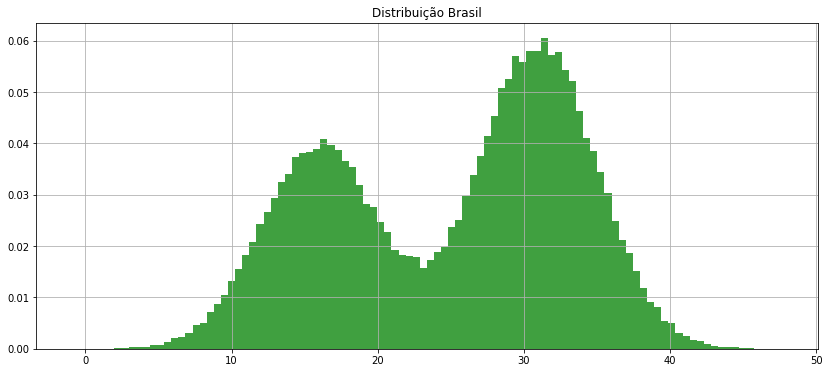

Média 25.019155975477123
Desvio 8.366992844612579
Tamanho 100000


In [84]:
from scipy.stats import norm


mean = 16
std = 4
rvNordeste = norm(loc=mean, scale=std)

mean = 31
std = 4
rvSudeste = norm(loc=mean, scale=std)


proporcao_Nordeste = 28/(28+42)
populacaoNordeste = rvNordeste.rvs(size=int(proporcao_Nordeste*100000), random_state=random_state)
print('Média {}'.format(np.mean(populacaoNordeste)))
print('Desvio {}'.format(np.std(populacaoNordeste)))
print('Tamanho {}'.format(len(populacaoNordeste)))


proporcao_Sudeste = 42/(28+42)
populacaoSudeste = rvSudeste.rvs(size=int(proporcao_Sudeste*100000), random_state=random_state)
print('Média {}'.format(np.mean(populacaoSudeste)))
print('Desvio {}'.format(np.std(populacaoSudeste)))
print('Tamanho {}'.format(len(populacaoSudeste)))

populacaoBrasil = np.concatenate((populacaoNordeste,populacaoSudeste))
np.random.shuffle(populacaoBrasil)

fig, axs = plt.subplots(1, 1, figsize=(14,6))

axs.hist(populacaoBrasil, density=True, facecolor='g', alpha=0.75, bins=100)
axs.grid(True)
axs.set_title('Distribuição Brasil')


plt.show()

print('Média {}'.format(np.mean(populacaoBrasil)))
print('Desvio {}'.format(np.std(populacaoBrasil)))
print('Tamanho {}'.format(len(populacaoBrasil)))

In [85]:
amostras = 1000
tamanho_amostra = 100
np.random.seed(1)
medias = np.zeros((amostras,1))
for i in range(0,amostras,1):
    medias[i]=np.mean(populacaoBrasil[np.random.randint(0, len(populacaoBrasil),tamanho_amostra)])

Média 25.02470293744417
Desvio 0.8322829426817415


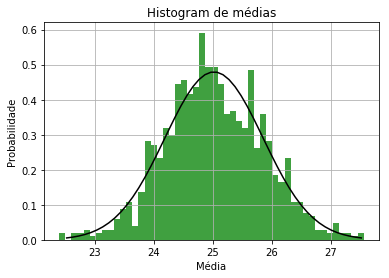

In [86]:
# A distribuição das médias aproxima-se de uma Normal, independente da distribuição original que gerou as amostras

n, bins, patches = plt.hist(medias, density=True, facecolor='g', alpha=0.75, bins=50)

mean_ = np.mean(medias)
std_ = np.std(medias)
print('Média {}'.format(mean_))
print('Desvio {}'.format(std_))

rv = norm(loc=mean_, scale=std_)

intervalo = np.linspace(mean_-3*std_,mean_+3*std_, num=50)
plt.plot(intervalo, rv.pdf(intervalo), 'k-', label='pdf')

plt.xlabel('Média')
plt.ylabel('Probabilidade')
plt.title('Histogram de médias')
plt.grid(True)
plt.show()

In [87]:
np.random.seed(1)
amostra_1 = populacaoBrasil[np.random.randint(0, len(populacaoBrasil),tamanho_amostra)]
media_1 =np.mean(amostra_1)
std_1 =np.std(amostra_1)

print('Média {}'.format(media_1))
print('Desvio {}'.format(std_1))
print('Desvio corrigido {}'.format(std_1/np.sqrt(tamanho_amostra)))
print('O valor real estará entre {} e {}'.format(media_1-2*std_1/np.sqrt(tamanho_amostra),
                                                media_1+2*std_1/np.sqrt(tamanho_amostra)))

Média 23.435427233945504
Desvio 8.634068631129214
Desvio corrigido 0.8634068631129214
O valor real estará entre 21.70861350771966 e 25.162240960171346


In [88]:
np.random.seed(2)
amostra_Nordeste = populacaoNordeste[np.random.randint(0, len(populacaoNordeste),40)]
media_Nordeste =np.mean(amostra_Nordeste)
std_Nordeste =np.std(amostra_Nordeste)

print('Média {}'.format(media_Nordeste))
print('Desvio {}'.format(std_Nordeste))
print('Desvio corrigido {}'.format(std_Nordeste/np.sqrt(40)))
min_Nordeste = media_Nordeste-2*std_Nordeste/np.sqrt(40)
max_Nordeste = media_Nordeste+2*std_Nordeste/np.sqrt(40)
print('O valor real estará entre {} e {}'.format(min_Nordeste,max_Nordeste
                                                ))

Média 15.611378713051312
Desvio 3.8934107987986204
Desvio corrigido 0.61560229954496
O valor real estará entre 14.380174113961392 e 16.842583312141233


In [89]:
np.random.seed(2)
amostra_Sudeste = populacaoSudeste[np.random.randint(0, len(populacaoSudeste),60)]
media_Sudeste =np.mean(amostra_Sudeste)
std_Sudeste =np.std(amostra_Sudeste)

print('Média {}'.format(media_Sudeste))
print('Desvio {}'.format(std_Sudeste))
print('Desvio corrigido {}'.format(std_Sudeste/np.sqrt(60)))
min_Sudeste = media_Sudeste-2*std_Sudeste/np.sqrt(60)
max_Sudeste = media_Sudeste+2*std_Sudeste/np.sqrt(60)
print('O valor real estará entre {} e {}'.format(min_Sudeste,max_Sudeste
                                                ))

Média 30.58479275301054
Desvio 4.03786091625855
Desvio corrigido 0.5212856027657061
O valor real estará entre 29.542221547479127 e 31.627363958541952


In [90]:
print(min_Nordeste*proporcao_Nordeste + min_Sudeste*proporcao_Sudeste)
print(max_Nordeste*proporcao_Nordeste + max_Sudeste*proporcao_Sudeste)

23.47740257407203
25.713451699981665


<font size="6" color="red">Outliers</font>

Outliers são medidas que se afastam das demais medidas de um conjunto.

Podem derivar de erros de medição ou se tratar de eventos raros.

Em ambos os caso merecem atenção, ou para que sejam corrigidos, no caso de erro, ou para verificar a origem de tais eventos raros.

Resumidamente podemos usar duas técnicas para localização de Outliers: desvio padrão e percentis.

Independente da técnica, a plotagem de um gráfico boxplot é útil para verificarmos sua presença.


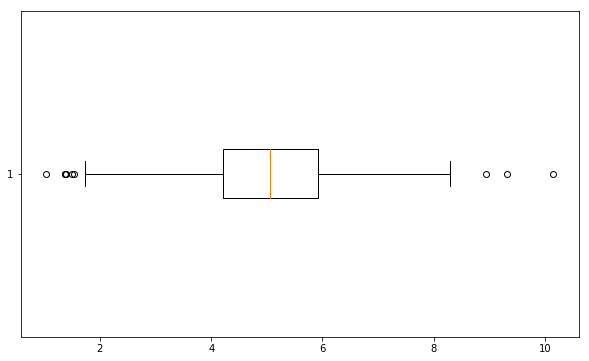

In [91]:
repeticoes = 1000

# População normal
mean = 5
std = 1.3
rv_norm = stat.norm(loc=mean, scale=std)
populacao_norm = rv_norm.rvs(size=repeticoes, random_state=random_state)

fig, axs = plt.subplots(1, 1, figsize=(10,6))
_ = plt.boxplot(populacao_norm,vert =False, meanline =True)

## Utilizando desvio padrão

In [92]:
media = np.mean(populacao_norm)
std = np.std(populacao_norm)

print('Média {}, STD {}'.format(media,std))

outliers1 = np.where(populacao_norm > (media+3*std))
outliers2 = np.where(populacao_norm < (media-3*std))

outliers = np.concatenate( (outliers1,outliers2), axis=1)

populacao_norm[outliers]

Média 5.050456219007482, STD 1.2753053741118752


array([[ 8.94011425, 10.14618352,  9.31740238,  1.03010631]])

## Utilizando quartis

In [93]:
q25, q75 = np.percentile(populacao_norm, 25), np.percentile(populacao_norm, 75)

iqr= q75 - q25

outliers1 = np.where(populacao_norm > (q75+1.5*iqr))
outliers2 = np.where(populacao_norm < (q25-1.5*iqr))

outliers = np.concatenate( (outliers1,outliers2), axis=1)

populacao_norm[outliers]

array([[ 8.94011425, 10.14618352,  9.31740238,  1.3689895 ,  1.38270519,
         1.37170467,  1.49212974,  1.03010631,  1.53663628]])

<font size="3" color="blue">Exercício: Outliers no índice de felicidade</font>


Plotar o boxplot com os indicadores do índice de felicidade

Verificar se há indicadores com outliers

Escolher um dos indicadores com outliers e verificar quais são os países que são outliers usando quartis e desvio padrão.

In [94]:
if IN_KAGGLE:
    df_original = pd.read_csv("../input/2017.csv")
else:
    df_original = pd.read_csv("2017.csv")
    

df_original.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [95]:
df = df_original.loc[:,[  'Happiness.Score',  'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.','Dystopia.Residual']]

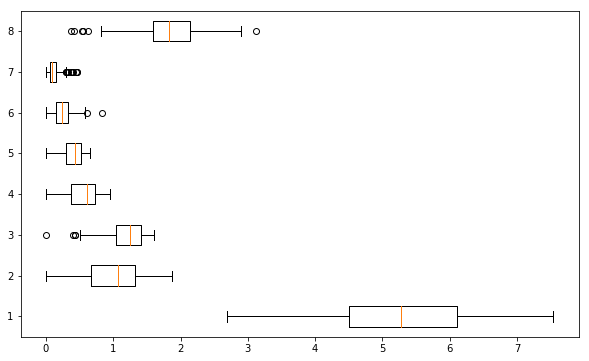

In [96]:
fig, axs = plt.subplots(1, 1, figsize=(10,6))
_ = plt.boxplot(df.T,vert =False, meanline =True)

In [97]:
populacao_norm = df.Family.values

q25, q75 = np.percentile(populacao_norm, 25), np.percentile(populacao_norm, 75)

iqr= q75 - q25

outliers1 = np.where(populacao_norm > (q75+1.5*iqr))
outliers2 = np.where(populacao_norm < (q25-1.5*iqr))

outliers = np.concatenate( (outliers1,outliers2), axis=1)

df_original.Country[outliers[0]]

142                       Benin
149                        Togo
151                       Syria
154    Central African Republic
Name: Country, dtype: object

In [98]:
media = np.mean(populacao_norm)
std = np.std(populacao_norm)

print('Média {}, STD {}'.format(media,std))

outliers1 = np.where(populacao_norm > (media+3*std))
outliers2 = np.where(populacao_norm < (media-3*std))

outliers = np.concatenate( (outliers1,outliers2), axis=1)

df_original.Country[outliers[0]]

Média 1.188897750454564, STD 0.28633475827662425


154    Central African Republic
Name: Country, dtype: object

<font size="6" color="red">Anexo I - Funções Úteis</font>

## Gerando números aleatórios


In [99]:
# Gerando int - biblioteca python standard
print(random.randrange(100, 1000, 2))
print(random.randint(100, 1000))

# Gerando int - biblioteca numpy
print(np.random.randint(100, 1000,2))

# Gerando float - biblioteca python standard
print(random.random())
print(random.uniform(100, 1000))
print(random.normalvariate(1, 1))

# Gerando float - biblioteca numpy
print(np.random.random(5))
print(np.random.randn(5))

np.random.random_sample(size=100)

234
114
[593 492]
0.8267798938959428
219.18654691923535
2.9957721463897267
[0.66306179 0.61302969 0.990852   0.1194848  0.14856478]
[ 0.0319746   1.18246826 -1.12076831 -0.85800742 -0.52715869]


array([4.67842493e-01, 2.74173259e-01, 7.98200388e-01, 8.14138413e-01,
       9.48090422e-01, 8.22884640e-01, 5.15139121e-01, 2.20998153e-01,
       7.46631408e-01, 4.31537770e-01, 8.88303749e-01, 9.41193305e-01,
       5.03012253e-01, 7.02042040e-01, 7.06542006e-01, 4.81021756e-01,
       9.60313732e-01, 4.26022526e-01, 3.22874213e-01, 7.61929997e-01,
       9.32628564e-01, 7.11217243e-01, 5.17430764e-01, 8.84471598e-01,
       5.53633841e-01, 5.73642495e-01, 3.93933295e-01, 9.26546750e-01,
       5.54441943e-03, 7.28498496e-01, 3.55753629e-01, 2.12933237e-01,
       3.62027411e-01, 8.78300287e-01, 3.63325891e-01, 5.03206919e-01,
       7.67488260e-01, 9.14475571e-01, 8.26368007e-01, 4.11746439e-01,
       6.30842663e-01, 3.41911600e-01, 3.81692941e-01, 9.62459572e-01,
       6.47014229e-01, 9.57845670e-01, 8.03452128e-01, 2.29385960e-01,
       8.79202028e-01, 5.92496363e-01, 7.86172242e-01, 5.32144441e-01,
       9.68290573e-01, 5.74953535e-01, 4.76843408e-01, 4.21138367e-01,
      

## Gerando números não aleatórios

In [100]:
print(np.linspace(0.0,1.0,11))
print(np.arange(0.0,10.0,3))
print(np.logspace(0.0,10.0,3))


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0. 3. 6. 9.]
[1.e+00 1.e+05 1.e+10]


## Escolha

In [101]:
# Escolha com reposição
# usando numpy np.random.choice(10,size=10,replace=True)


faces = list(range(1,7))
lancamentos = 600
pesos = [1/6,1/6,0.5/6,0.5/6,2/6,1/6]
resultados = random.choices(population=faces, weights=pesos, k=lancamentos)
#print(resultados)
for i in faces:
    print('Face {}, peso {}, vezes {}'.format(i,pesos[i-1],resultados.count(i)))

Face 1, peso 0.16666666666666666, vezes 114
Face 2, peso 0.16666666666666666, vezes 111
Face 3, peso 0.08333333333333333, vezes 38
Face 4, peso 0.08333333333333333, vezes 47
Face 5, peso 0.3333333333333333, vezes 181
Face 6, peso 0.16666666666666666, vezes 109


In [102]:
# Escolha sem reposição
# usando numpy np.random.choice(10,size=10,replace=False)


lista = list(range(1,7))
random.sample(population=lista, k=len(lista))


[6, 2, 5, 1, 4, 3]

## Embaralhamento

In [103]:
# Embaralhamento
# usando numpy np.random.choices

lista = list(range(1,7))
random.shuffle(lista)
lista

[2, 3, 1, 4, 5, 6]

<font size="6" color="red">Anexo II - Referências</font>

Tutoriais

https://www.youtube.com/watch?v=Iq9DzN6mvYA

https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

http://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb

https://www.youtube.com/watch?v=KhAUfqhLakw

https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

https://www.datacamp.com/community/tutorials/python-statistics-data-science

https://machinelearningmastery.com/


Distribuições de probabilidade

http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

Cursos

https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE210x+1T2018/course/#block-v1:UCSanDiegoX+DSE210x+1T2018+type@chapter+block@c1c0e5a497924a40b800bf69e96b4004

Documentação bibliotecas Python

https://docs.python.org/3/library/statistics.html

https://docs.python.org/3/library/random.html

Documentação bibliotecas SciPy

https://docs.scipy.org/doc/scipy/reference/stats.html

Documentação bibliotecas NumPy

https://docs.scipy.org/doc/numpy/reference/routines.random.html

https://docs.scipy.org/doc/numpy/reference/routines.statistics.html

Dataframe

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
